# 체력인증센터 이용자 현황

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', family='Noto Sans KR')
plt.rcParams.update({'font.size': 18})
print(plt.rcParams['font.family'])

['Noto Sans KR']


## 1. 데이터 로드

| 컬럼 영문명 | 컬럼 한글명 | 데이터타입 |
| :---: | :---: | :---: |
| TEST_CNT | 측정 회차 | NUMERIC |
| CENTER_NM	| 센터명 |	VARCHAR	|		
| AGE_GBN | 나이구분 | VARCHAR |
| TEST_GBN | 측정구분 | VARCHAR |
| TEST_AGE | 측정나이 | NUMERIC |
| INPUT_GBN | 입력구분 | VARCHAR |
| CERT_GBN | 상장구분 | VARCHAR |
| TEST_YMD | 측정일 | CHAR |
| TEST_SEX | 측정회원성별 | CHAR |

In [3]:
# 국민체력측정 현황 데이터
sttus_1901 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201901.csv')
sttus_1902 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201902.csv')
sttus_1903 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201903.csv')
sttus_1904 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201904.csv')
sttus_1905 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201905.csv')
sttus_1906 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201906.csv')
sttus_1907 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201907.csv')
sttus_1908 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201908.csv')
sttus_1909 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201909.csv')
sttus_1910 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201910.csv')
sttus_1911 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201911.csv')
sttus_1912 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_201912.csv')
sttus_2001 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202001.csv')
sttus_2002 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202002.csv')
sttus_2003 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202003.csv')
sttus_2004 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202004.csv')
sttus_2005 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202005.csv')
sttus_2006 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202006.csv')
sttus_2007 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202007.csv')
sttus_2008 = pd.read_csv('./data/KS_NFA_FTNESS_MESURE_STTUS_202008.csv')

In [4]:
sttus = [sttus_1901, sttus_1902, sttus_1903, sttus_1904, sttus_1905, sttus_1906, sttus_1907, 
         sttus_1908, sttus_1909, sttus_1910, sttus_1911, sttus_1912, sttus_2001, sttus_2002, 
         sttus_2003, sttus_2004, sttus_2005, sttus_2006, sttus_2007, sttus_2008]

In [5]:
sttus_merged = pd.concat(sttus, ignore_index=True)       # 201901 - 202008 통합
sttus_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351786 entries, 0 to 351785
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   TEST_CNT   351786 non-null  int64 
 1   CENTER_NM  351773 non-null  object
 2   AGE_GBN    351786 non-null  object
 3   TEST_GBN   345693 non-null  object
 4   TEST_AGE   351786 non-null  int64 
 5   INPUT_GBN  344519 non-null  object
 6   CERT_GBN   351786 non-null  object
 7   TEST_YMD   351786 non-null  int64 
 8   TEST_SEX   351786 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.2+ MB


In [6]:
sttus_merged.describe()

,TEST_CNT,TEST_AGE,TEST_YMD
count,351786.000000,351786.000000,3.517860e+05
mean,1.820286,33.210799,2.019202e+07
std,2.769028,22.238897,3.378717e+03
min,1.000000,11.000000,2.019010e+07
25%,1.000000,16.000000,2.019050e+07
50%,1.000000,21.000000,2.019072e+07
75%,2.000000,53.000000,2.019110e+07
max,322.000000,104.000000,2.020082e+07


In [7]:
# 코로나 이전과 이후 표시
sttus_merged['IS_CORONA'] = sttus_merged['TEST_YMD'] >= 20200201
sttus_merged.head()
sttus_merged.tail()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA
351781,4,남구(부산),성인,일반,20,관리자,참가상,20200803,M,True
351782,1,계룡,성인,일반,20,관리자,참가상,20200803,M,True
351783,1,남구(울산),청소년,출장,16,관리자,은상,20200803,M,True
351784,1,강릉,성인,일반,37,관리자,동상,20200805,M,True
351785,1,창원마산회원,성인,일반,19,관리자,동상,20200805,M,True


In [8]:
# 출장 여부 표시
sttus_merged['IS_TRIP'] = sttus_merged['TEST_GBN'] == '출장'
sttus_merged.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA,IS_TRIP
0,1,세종,성인,출장,27,관리자,은상,20190103,M,False,True
1,1,춘천,청소년,출장,15,관리자,참가상,20190103,F,False,True
2,1,춘천,청소년,출장,15,관리자,참가상,20190103,F,False,True
3,4,청주,성인,일반,61,인바디,참가상,20190103,F,False,False
4,1,춘천,청소년,출장,15,관리자,참가상,20190103,M,False,True


In [9]:
# 코로나 이전과 코로나 이후 데이터 추출
# 코로나 이후 데이터는 202002 - 202008의 데이터이므로
# 비교를 위해 201902 - 201908의 데이터 추출
sttus_pre = sttus_merged.loc[(sttus_merged.TEST_YMD >= 20190201)&(sttus_merged.TEST_YMD <= 20190831), :]
sttus_post = sttus_merged.loc[sttus_merged['IS_CORONA'] == True, :]
print('코로나 이전 이용자 수 :', sttus_pre.shape[0])
print('코로나 이후 이용자 수 :', sttus_post.shape[0])

코로나 이전 이용자 수 : 197782
코로나 이후 이용자 수 : 38274


In [10]:
sttus_merged.INPUT_GBN.value_counts()

관리자    314360
인바디     30159
Name: INPUT_GBN, dtype: int64

## 2. EDA

### 2.1. TEST_CNT
`TEST_CNT`는 해당 사용자가 몇 번째 체력 인증을 하는지를 나타낸다.

In [11]:
sttus_merged.TEST_CNT.value_counts()

1      231324
2       65553
3       25464
4       12309
5        5464
6        2945
7        1869
8        1367
9         886
10        683
11        549
12        465
13        426
14        368
15        307
16        252
17        215
18        193
19        173
20        172
21        147
22        119
23         94
24         77
25         69
26         58
27         44
28         35
29         28
30         25
31         21
32         19
33         14
34          9
35          8
36          5
37          4
39          3
42          2
41          2
43          2
38          2
40          2
315         1
320         1
319         1
318         1
317         1
316         1
321         1
313         1
312         1
311         1
310         1
46          1
322         1
Name: TEST_CNT, dtype: int64

2/3가 첫 이용자이며 1/3이 다시 센터에 방문한 이용자(중복 허용)이다. 값을 뽑았을 때 최대값이 **46**으로 보이며 그 이상의 값은 이상치로 판단된다. 그러므로 46보다 큰 데이터를 제거해준다.

In [12]:
# TEST_CNT의 이상치 제거
out_index = sttus_merged[sttus_merged['TEST_CNT'] > 46].index
sttus_merged = sttus_merged.drop(out_index)

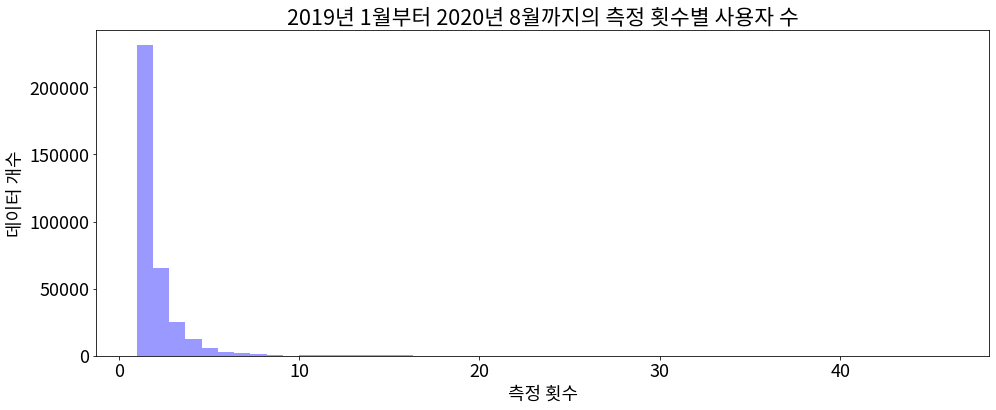

In [13]:
plt.figure(figsize=(16, 6))
sns.distplot(sttus_merged.TEST_CNT, kde=False, color='b')
plt.xlabel('측정 횟수')
plt.ylabel('데이터 개수')
plt.title('2019년 1월부터 2020년 8월까지의 측정 횟수별 사용자 수')
plt.show()

In [14]:
print('평균 이용자 측정 횟수 :', round(sttus_merged.TEST_CNT.mean(), 2))

평균 이용자 측정 횟수 : 1.81


즉 일회적인 측정에서 끝나는 것이 아니라 또 측정을 한다는 것을 볼 수 있다.

그럼 코로나 이후의 이용자들의 측정 횟수는 어떻게 될까? 처음 이용하는 사람이 많을까 아님 어떤 목적에 의해서 이용하는 사람들이 많을까? 한 번 살펴보자. 그 전에 재이용 여부 컬럼 `IS_REVISIT`을 생성해주자.

In [15]:
# 재이용 여부
sttus_merged['IS_REVISIT'] = sttus_merged.TEST_CNT > 1
sttus_pre['IS_REVISIT'] = sttus_pre.TEST_CNT > 1
sttus_post['IS_REVISIT'] = sttus_post.TEST_CNT > 1

sttus_post.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA,IS_TRIP,IS_REVISIT
313512,2,김천,성인,일반,22,관리자,참가상,20200205,F,True,False,True
313513,1,남구(울산),노인,일반,69,관리자,참가상,20200204,M,True,False,False
313514,1,화성,노인,일반,71,관리자,은상,20200204,M,True,False,False
313515,1,사천,노인,일반,75,관리자,은상,20200204,M,True,False,False
313516,1,김천,노인,일반,68,관리자,동상,20200204,M,True,False,False


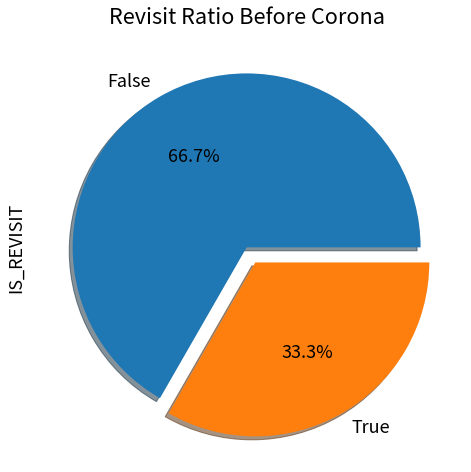

In [16]:
# 코로나 이전 이용자 수의 재방문 여부
plt.figure(figsize=(8, 8))
sttus_pre.IS_REVISIT.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('Revisit Ratio Before Corona')
plt.show()

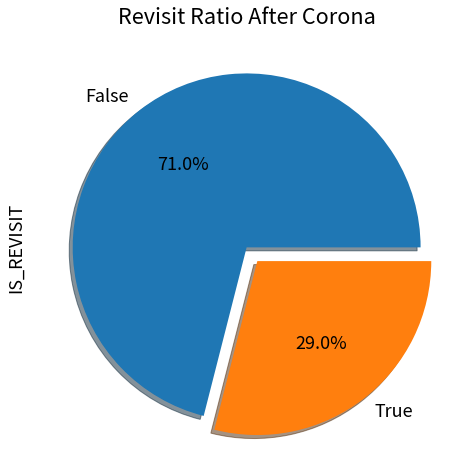

In [17]:
# 코로나 이후 이용자 수의 재방문 여부
plt.figure(figsize=(8, 8))
sttus_post.IS_REVISIT.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('Revisit Ratio After Corona')
plt.show()

전체 이용자수가 19%로 감소, 첫 이용자도 20%로 감소, 재방문 이용자는 16%로 감소한 것으로 보아 첫 이용자의 비율이 늘고 재방문 이용자의 비율이 감소한 것을 볼 수 있다.

### 2.2. CENTER_NM
`CENTER_NM`은 측정을 한 센터명을 말한다. 2020년 10월 기준 총 78개의 센터가 있다. 특히 올해 25개의 센터를 개관하였다.

In [18]:
temp = pd.DataFrame(sttus_merged.CENTER_NM.value_counts())
print(f'총 {temp.shape[0]} 곳의 센터가 존재하며 센터는 다음과 같다 :')
print(list(temp.index))

총 71 곳의 센터가 존재하며 센터는 다음과 같다 :
['연수', '남구(울산)', '마포', '전주', '삼척', 'KSPO송파(출장)', '세종', '서구(대전)', '동작', '충주', '남구(부산)', '성동', 'KSPO송파', '사하', '강릉', '사천', '사상', '금천', '달서', '성남', '부천', '순천', '춘천', '의정부', '동구(광주)', '오산', '안동', '청주', '서초', '증평', '광산', '화성', '창원', '원주', '포항', '목포', '제주', '천안', '영동', '남원', '나주', '북구(부산)', '곡성', '노원', '스포원(금정)', 'KSPO아산(출장)', '군산', '김천', '북구(광주)', '계룡', '구미', 'KSPO아산', '시흥', 'KSPO송파(출장A)', 'KSPO송파(출장B)', 'KSPO대구(출장A)', 'KSPO대구(출장B)', 'KSPO대구', '창원마산회원', '익산', '영암', '포천', '진천', '경산', '고양', '영주', '광주', '정읍', '태백', 'KSPO광주', 'KSPO(버스)']


우선 센터의 평균 이용자 수를 살펴보자.

In [19]:
print('2019년 1월부터 2020년 8월까지의 센터별 평균 이용자 수 :', sttus_merged.CENTER_NM.value_counts().mean())
print('2019년 1월부터 2020년 8월까지의 최대 이용자 수 :', sttus_merged.CENTER_NM.value_counts().max())
print('2019년 1월부터 2020년 8월까지의 최소 이용자 수 :', sttus_merged.CENTER_NM.value_counts().min())

2019년 1월부터 2020년 8월까지의 센터별 평균 이용자 수 : 4954.549295774648
2019년 1월부터 2020년 8월까지의 최대 이용자 수 : 10217
2019년 1월부터 2020년 8월까지의 최소 이용자 수 : 2


In [20]:
# 센터별 이용자 수 상위 20 곳
sttus_merged.CENTER_NM.value_counts()[:20]

연수            10217
남구(울산)         9388
마포             9175
전주             8775
삼척             8770
KSPO송파(출장)     8656
세종             8411
서구(대전)         8268
동작             8090
충주             7903
남구(부산)         7792
성동             7593
KSPO송파         7554
사하             7506
강릉             7426
사천             7391
사상             7250
금천             7242
달서             7157
성남             7120
Name: CENTER_NM, dtype: int64

In [21]:
# 센터별 이용자 수 하위 10 곳
sttus_merged.CENTER_NM.value_counts()[-20:]

KSPO아산         1889
시흥             1633
KSPO송파(출장A)    1400
KSPO송파(출장B)     931
KSPO대구(출장A)     590
KSPO대구(출장B)     585
KSPO대구          527
창원마산회원          526
익산              308
영암              154
포천              122
진천               97
경산               77
고양               66
영주               60
광주               58
정읍               33
태백                3
KSPO광주            2
KSPO(버스)          2
Name: CENTER_NM, dtype: int64

각 센터의 이름이 있지만 지역을 바로 알기 어렵고 새로 개관한 곳도 있기 때문에 국민체력100 홈페이지에 명시된 지역 분류를 따라 센터를 분류해보자.

In [22]:
seoul = ['KSPO송파', 'KSPO송파(출장)', 'KSPO송파(출장A)', 'KSPO송파(출장B)', '금천', '노원', '동작', '마포', '서초', '성동']
busan = ['사상', '사하', '남구(부산)', '스포원(금정)', '북구(부산)']
daegu = ['KSPO대구', 'KSPO대구(출장A)', 'KSPO대구(출장B)', '달서']
incheon = ['연수']
gwangju = ['KSPO광주', '북구(광주)', '동구(광주)', '광산']
daejeon = ['서구(대전)']
ulsan = ['남구(울산)']
gyeonggi = ['포천', '고양', '광주', '시흥', '의정부', '성남', '오산', '부천', '화성']
gangwon = ['태백', '삼척', '춘천', '강릉', '원주']
chungbuk = ['진천', '증평', '충주', '영동', '청주', ]
chungnam = ['KSPO아산', 'KSPO아산(출장)', '계룡', '천안']
jeonbuk = ['정읍', '익산', '군산', '전주', '남원']
jeonnam = ['영암', '나주', '곡성', '순천', '목포']
gyeongbuk = ['영주', '경산', '구미', '김천', '안동', '포항']
gyeongnam = ['창원마산회원', '사천', '창원']
jeju = ['제주']
sejong = ['세종']

In [23]:
total = seoul + busan + daegu + incheon + gwangju + daejeon + ulsan + gyeonggi + gangwon + chungbuk +\
        chungnam + jeonbuk + jeonnam + gyeongbuk + gyeongnam + jeju + sejong

In [24]:
# 대표 지역으로 분류
def get_region(center):
    region = ''
    
    if center in seoul: region = '서울'
    elif center in busan: region = '부산'
    elif center in daegu: region = '대구'
    elif center in incheon: region = '인천'
    elif center in gwangju: region = '광주'
    elif center in daejeon: region = '대전'
    elif center in ulsan: region = '울산'
    elif center in gyeonggi: region = '경기'
    elif center in gangwon: region = '강원'
    elif center in chungbuk: region = '충북'
    elif center in chungnam: region = '충남'
    elif center in jeonbuk: region = '전북'
    elif center in jeonnam: region = '전남'
    elif center in gyeongbuk: region = '경북'
    elif center in gyeongnam: region = '경남'
    elif center in jeju: region = '제주'
    elif center in sejong: region = '세종'
    else: region = '기타'
        
    return region

In [25]:
sttus_merged['REGION'] = sttus_merged['CENTER_NM'].apply(lambda x: get_region(x))
sttus_merged.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA,IS_TRIP,IS_REVISIT,REGION
0,1,세종,성인,출장,27,관리자,은상,20190103,M,False,True,False,세종
1,1,춘천,청소년,출장,15,관리자,참가상,20190103,F,False,True,False,강원
2,1,춘천,청소년,출장,15,관리자,참가상,20190103,F,False,True,False,강원
3,4,청주,성인,일반,61,인바디,참가상,20190103,F,False,False,True,충북
4,1,춘천,청소년,출장,15,관리자,참가상,20190103,M,False,True,False,강원


In [26]:
sttus_merged.REGION.value_counts()

서울    62627
경기    36394
부산    32895
강원    29654
충북    27412
전남    24583
전북    19663
경북    19613
광주    17683
충남    15632
경남    14421
인천    10217
울산     9388
대구     8859
세종     8411
대전     8268
제주     6051
기타        3
Name: REGION, dtype: int64

`기타`에 해당되는 데이터가 매우 적으므로 해당 데이터를 제거해준다.

In [27]:
drop_idx = sttus_merged.loc[sttus_merged.REGION=='기타', :].index
sttus_merged = sttus_merged.drop(drop_idx)

In [28]:
# sttus_pre와 sttus_post에도 적용
sttus_pre['REGION'] = sttus_pre['CENTER_NM'].apply(lambda x: get_region(x))
sttus_post['REGION'] = sttus_post['CENTER_NM'].apply(lambda x: get_region(x))

drop_idx_pre = sttus_pre.loc[sttus_pre.REGION=='기타', :].index
drop_idx_post = sttus_post.loc[sttus_post.REGION=='기타', :].index
sttus_pre = sttus_merged.drop(drop_idx_pre)
sttus_post = sttus_post.drop(drop_idx_post)

In [29]:
# 201901 - 202008 지역별 이용자 현황
sttus_merged.REGION.value_counts()

서울    62627
경기    36394
부산    32895
강원    29654
충북    27412
전남    24583
전북    19663
경북    19613
광주    17683
충남    15632
경남    14421
인천    10217
울산     9388
대구     8859
세종     8411
대전     8268
제주     6051
Name: REGION, dtype: int64

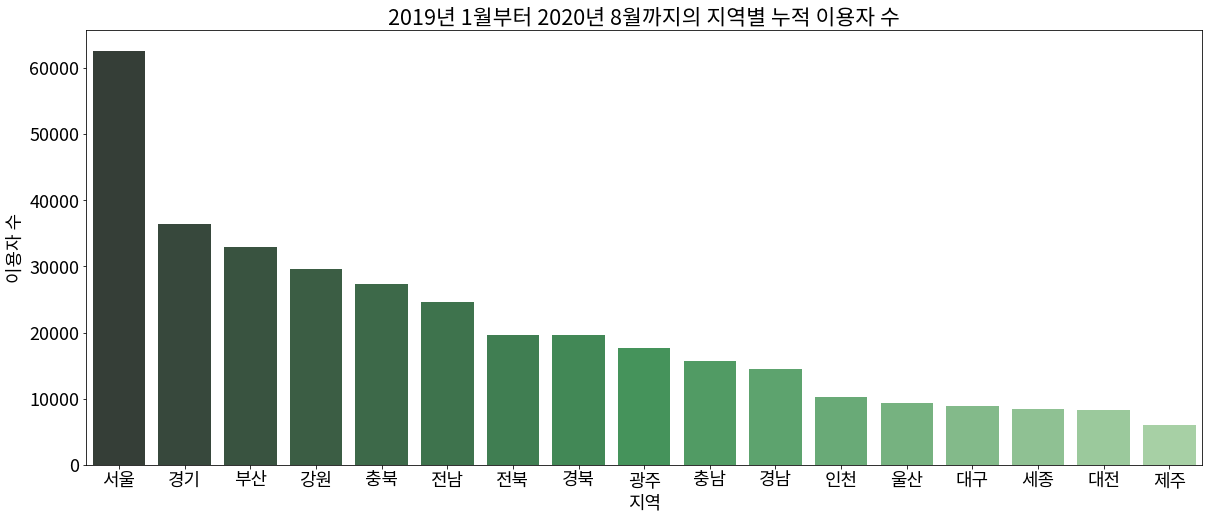

In [30]:
plt.figure(figsize=(20, 8))
sns.countplot(x='REGION', data=sttus_merged, order=sttus_merged.REGION.value_counts().index, palette='Greens_d')
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2019년 1월부터 2020년 8월까지의 지역별 누적 이용자 수')
plt.show()

확실히 수도권인 `서울`과 `경기` 이용자가 많은 것을 볼 수 있다. 그럼 코로나 이전과 이후의 각 시도별 이용자는 어떻게 변했는지 살펴보자.

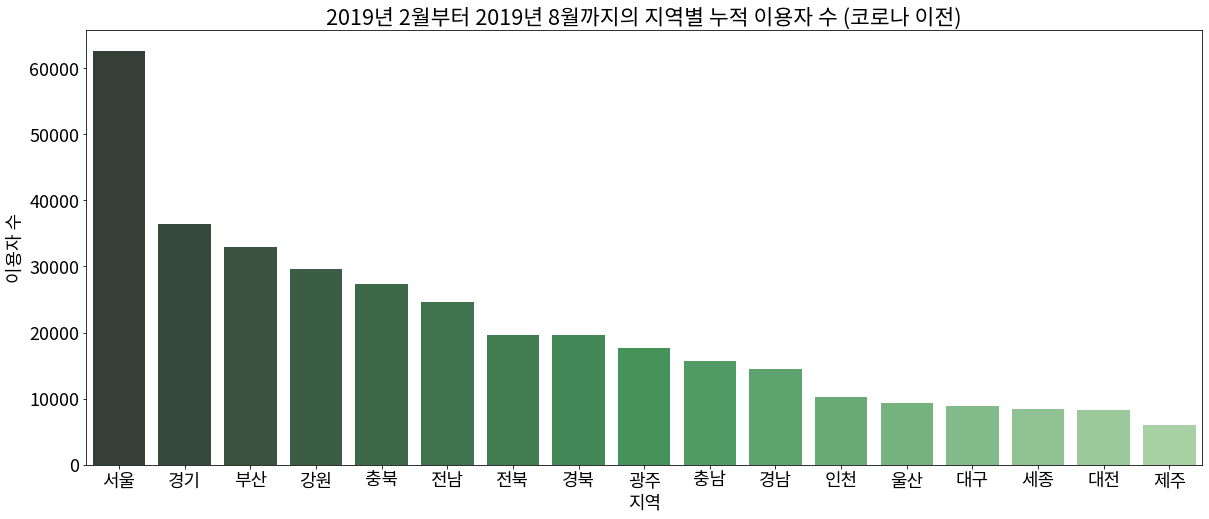

In [31]:
# 코로나 이전 지역별 누적 이용자 수
plt.figure(figsize=(20, 8))
sns.countplot(x='REGION', data=sttus_pre, order=sttus_pre.REGION.value_counts().index, palette='Greens_d')
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2019년 2월부터 2019년 8월까지의 지역별 누적 이용자 수 (코로나 이전)')
plt.show()

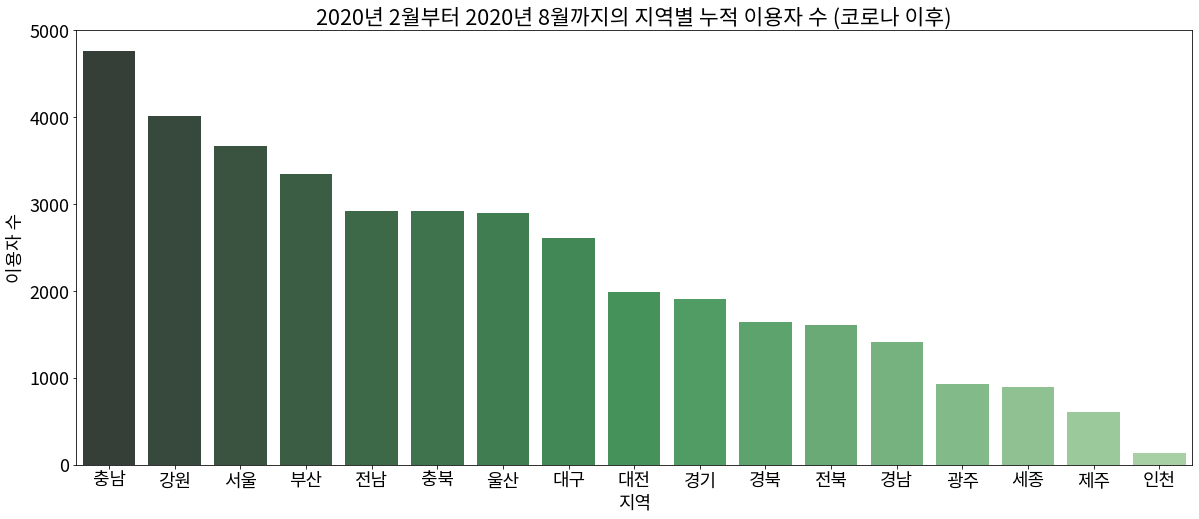

In [32]:
# 코로나 이후 지역별 누적 이용자 수
plt.figure(figsize=(20, 8))
sns.countplot(x='REGION', data=sttus_post, order=sttus_post.REGION.value_counts().index, palette='Greens_d')
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2020년 2월부터 2020년 8월까지의 지역별 누적 이용자 수 (코로나 이후)')
plt.show()

코로나 이후 `경기`, `서울`의 이용자 수가 줄어든 것을 볼 수 있다. 이제 지역별로 월별 이용자 수 감소 추이를 보자. `기타`는 3개의 데이터만 있으므로 제외시키자.

In [33]:
# TEST_YMD를 가지고 월별로 나눔
def date_to_month(date):
    date = str(date)[2:6]
    return int(date)

In [34]:
sttus_merged['TEST_MONTH'] = sttus_merged['TEST_YMD'].apply(lambda x: date_to_month(x))
sttus_pre['TEST_MONTH'] = sttus_pre['TEST_YMD'].apply(lambda x: date_to_month(x))
sttus_post['TEST_MONTH'] = sttus_post['TEST_YMD'].apply(lambda x: date_to_month(x))

In [35]:
# 지역
regions = ['서울', '경기', '인천', '강원', '충북', '충남', '대전', '세종', '전북', '전남', '광주',
          '경북', '경남', '대구', '부산', '울산', '제주']

In [36]:
# 월별 리스트
months = list(range(1901, 1913)) + list(range(2001, 2009))
print(months)

[1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]


In [37]:
# 지역별 월별 이용자 수 데이터프레임 생성
data = []

for region in regions:
    df = sttus_merged.loc[sttus_merged['REGION']==region, ['TEST_MONTH']]
    users = df.TEST_MONTH.value_counts().sort_index()
    temp = []
    for month in months:
        try:
            temp.append(users[month])
        except:
            temp.append(0)
    data.append(temp)

In [38]:
region_monthly = pd.DataFrame(data=data, index=regions, columns=months)
region_monthly.head(20)

,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,2001,2002,2003,2004,2005,2006,2007,2008
서울,1605,1154,6204,10742,8598,5034,3837,3608,4772,4881,4931,2309,1286,861,2,3,187,268,1222,1123
경기,252,143,3150,6066,6192,3384,2478,2864,2793,1720,2396,1492,1554,767,0,19,316,84,312,412
인천,319,187,924,1418,1690,1518,684,1525,611,284,445,150,327,60,0,0,0,0,0,75
강원,926,568,2314,7331,4304,869,1014,426,2832,1707,1735,543,1069,744,1,26,608,1196,647,794
충북,921,714,1878,2631,4627,3386,1112,1251,2490,2118,2274,480,614,945,0,0,136,568,633,634
충남,134,84,1786,190,1226,189,1223,122,621,1229,1626,1796,640,926,0,429,482,963,1189,777
대전,0,0,368,801,890,475,1259,453,652,552,672,158,0,0,0,0,277,611,67,1033
세종,227,272,675,284,1521,1230,817,747,309,452,422,170,391,321,0,4,152,202,74,141
전북,362,558,1754,2696,797,2127,1199,609,1146,2533,2808,711,752,638,0,0,106,260,265,342
전남,403,614,1935,3580,4000,1544,1244,913,1811,2467,1660,962,534,596,18,0,49,797,622,834


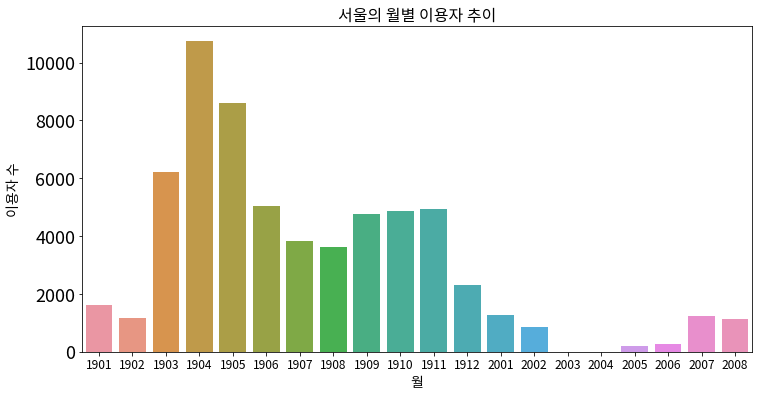

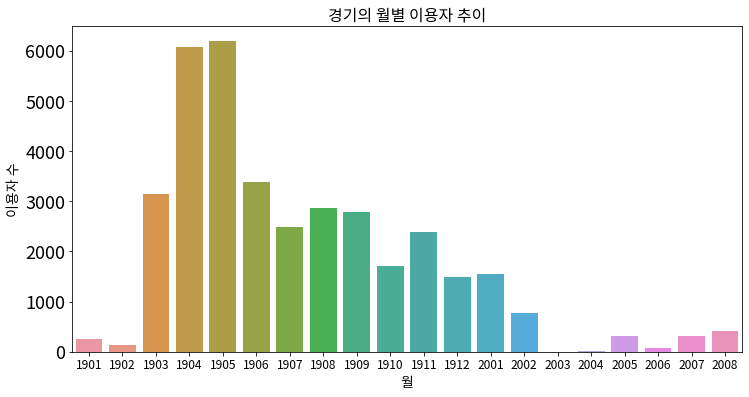

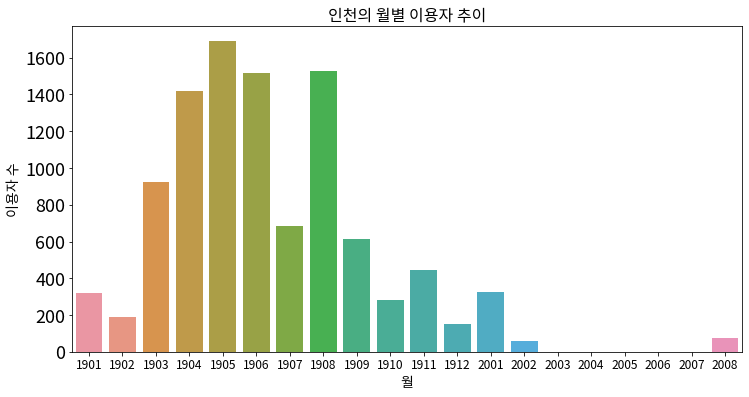

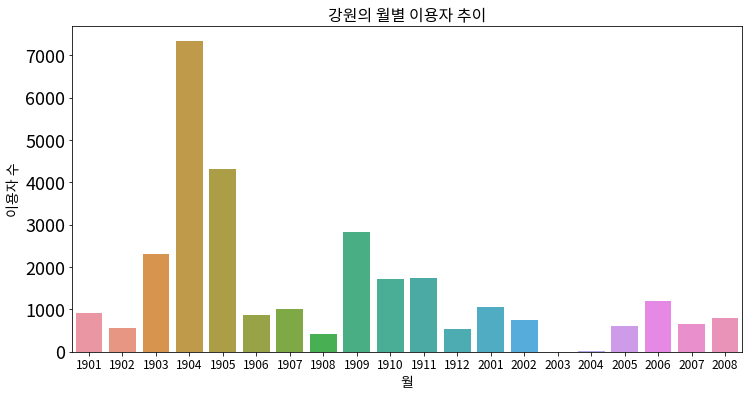

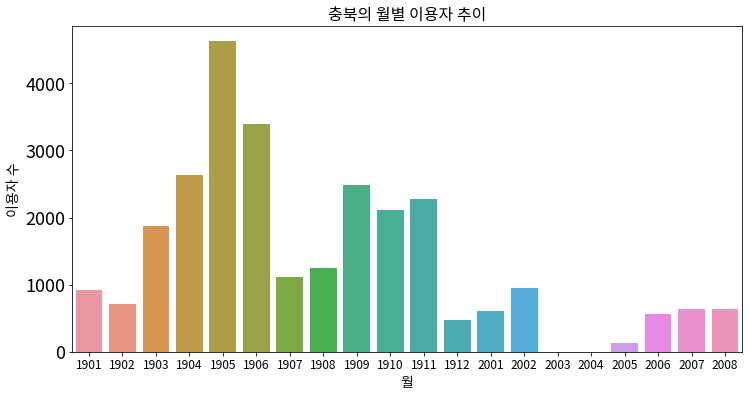

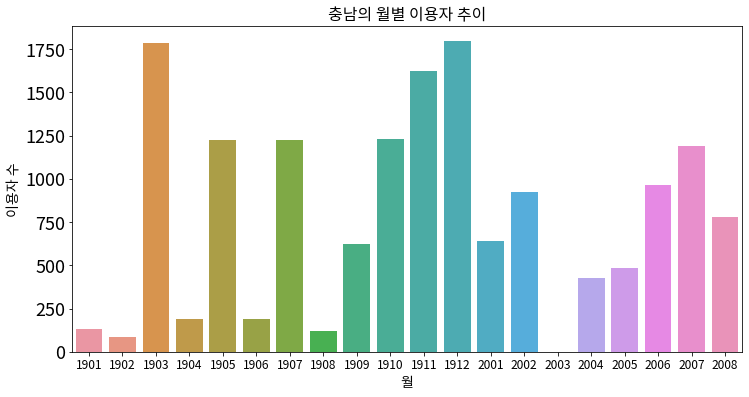

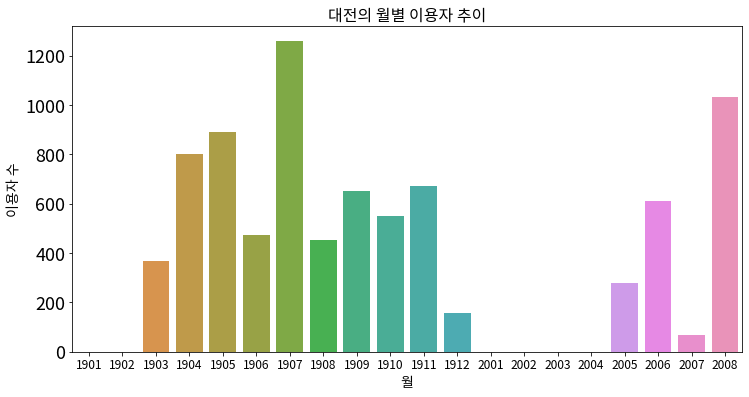

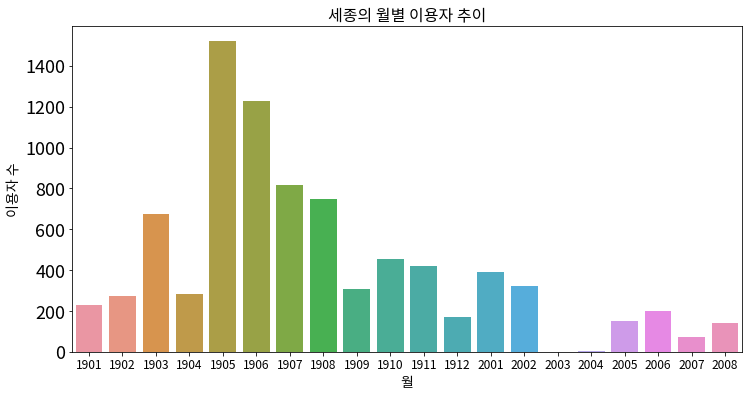

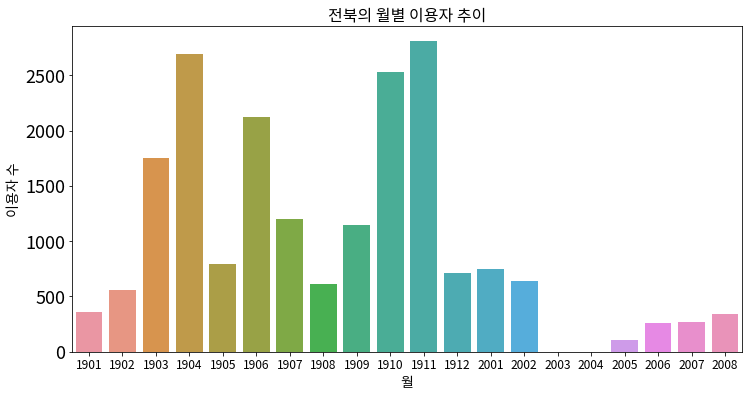

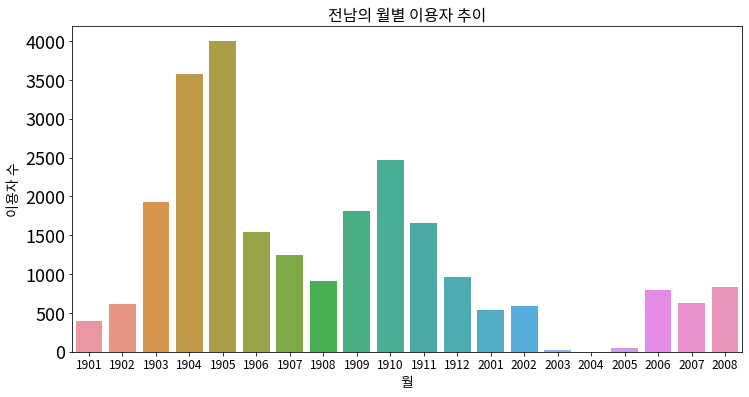

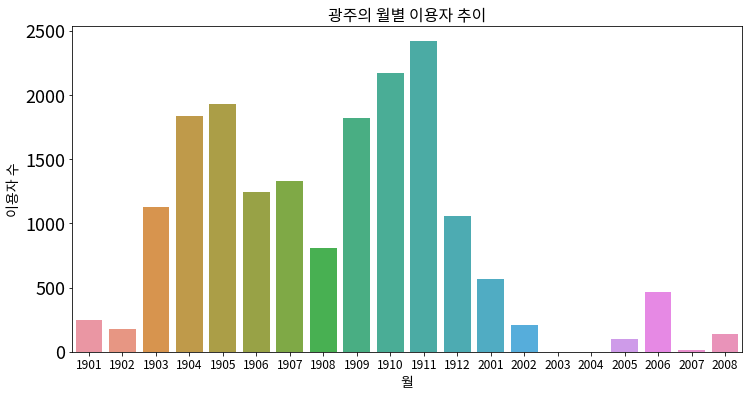

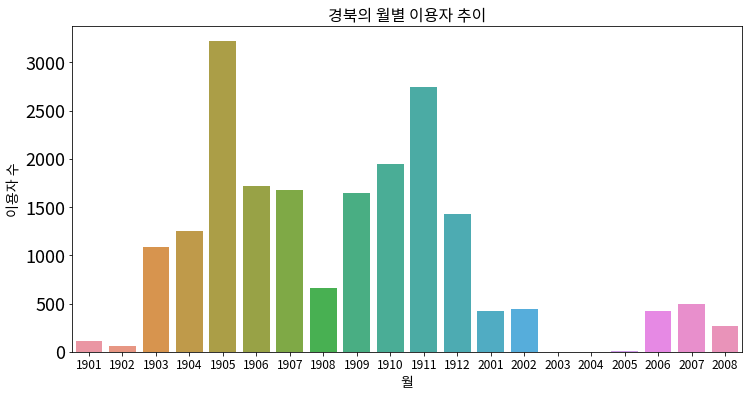

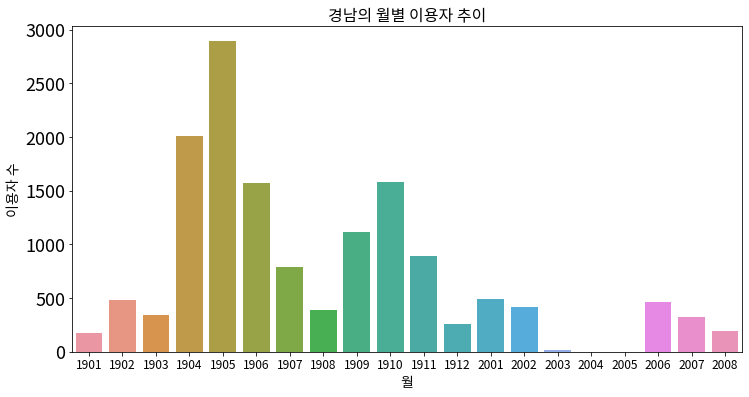

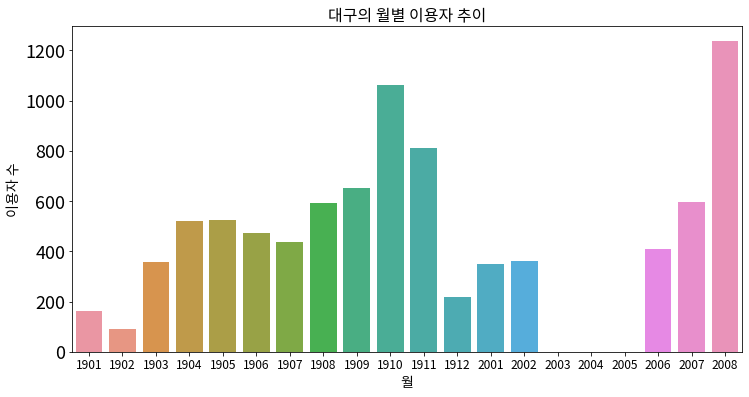

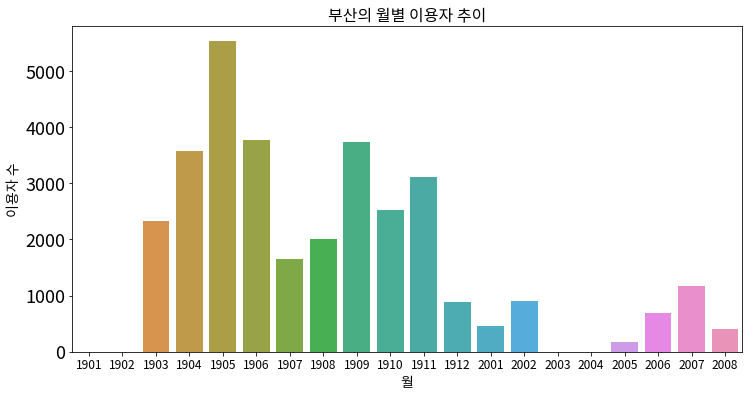

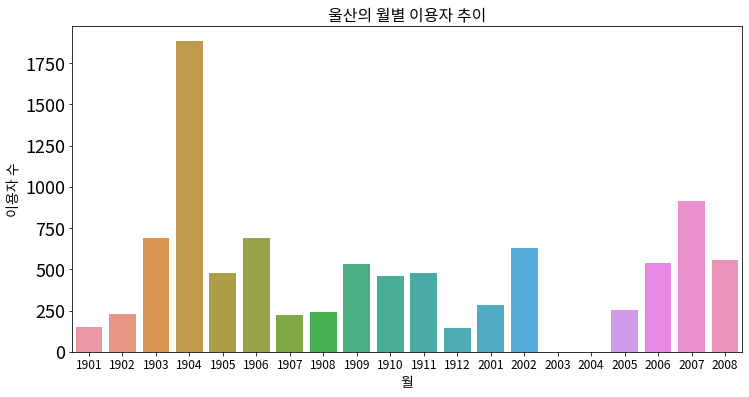

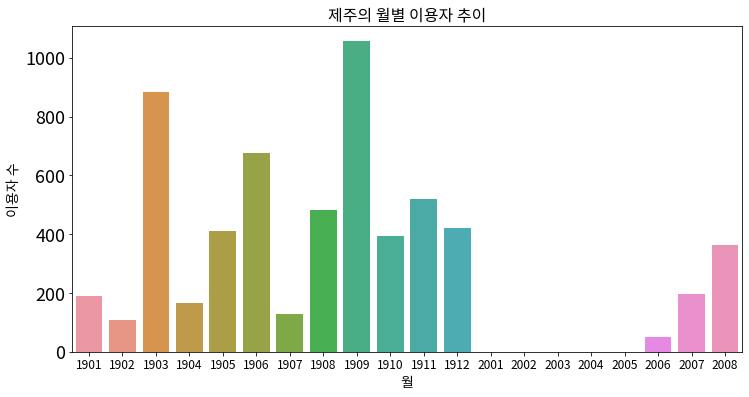

In [39]:
for region in regions:
    plt.figure(figsize=(12, 6))
    df = region_monthly.loc[region, :]
    sns.barplot(x=df.index, y=df.values)
    plt.xticks(fontsize=12)
    plt.xlabel('월', size=14)
    plt.ylabel('이용자 수', size=14)
    plt.title(f'{region}의 월별 이용자 추이', size=16)
    plt.show()

지역별로 엄청 차이는 나지 않지만 2월을 기점으로 3월 이후 사용자가 급격히 줄은 것을 볼 수 있다. 그러다 5월부터 제한적으로 운영을 했으나 작년 대비 이용자가 매우 적은 것을 볼 수 있다.

### 2.3. AGE_GBN
`AGE_GBN`은 청소년, 성인, 노인으로 나눈 카테고리형 변수이다. 이 변수를 월별 및 지역별로 어떻게 분포하는 지 살펴보자.

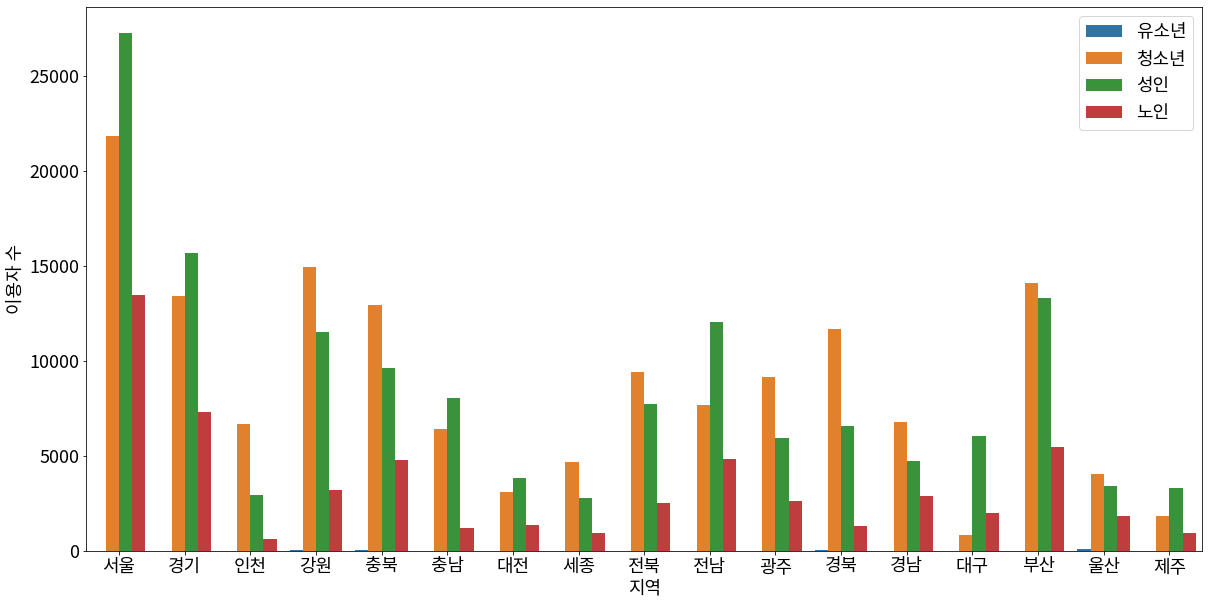

In [40]:
# 지역별 AGE_GBN 분포
plt.figure(figsize=(20, 10))
sns.countplot(x='REGION', hue='AGE_GBN', hue_order=['유소년', '청소년', '성인', '노인'], data=sttus_merged, order=regions)
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.legend(loc='upper right')
plt.show()

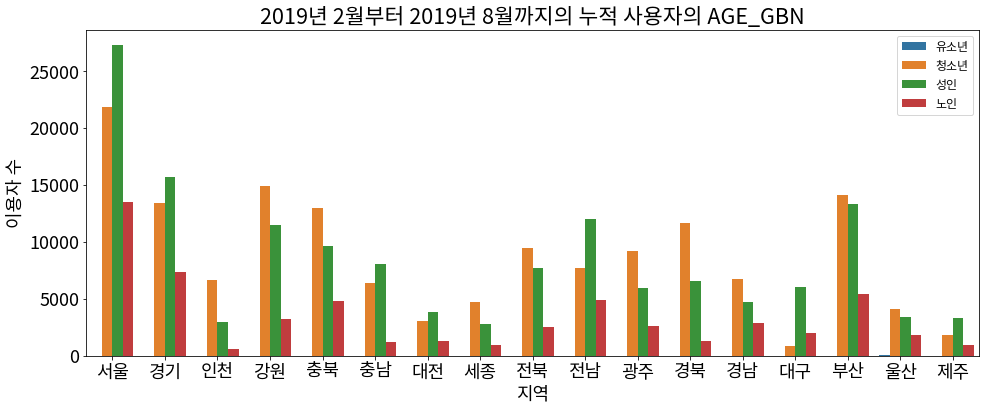

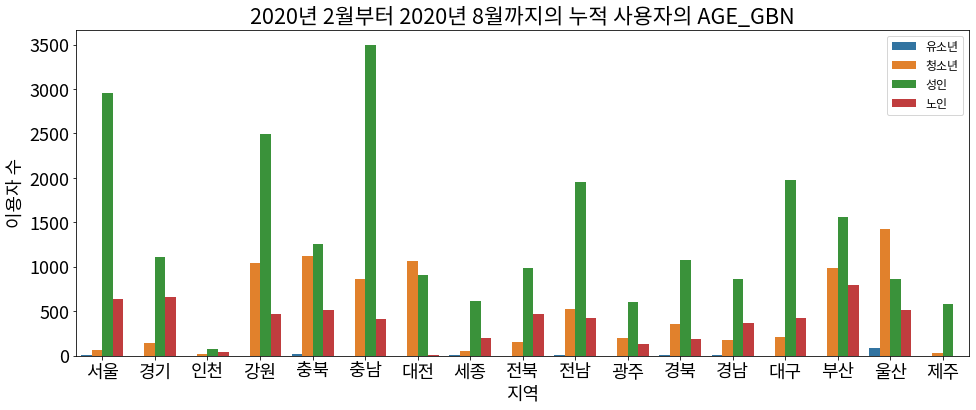

In [41]:
# 코로나 이전 AGE_GBN 분포
plt.figure(figsize=(16, 6))
sns.countplot(x='REGION', hue='AGE_GBN', hue_order=['유소년', '청소년', '성인', '노인'], data=sttus_pre, order=regions)
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2019년 2월부터 2019년 8월까지의 누적 사용자의 AGE_GBN')
plt.legend(fontsize=12, loc='upper right')

# 코로나 이후 AGE_GBN 분포
plt.figure(figsize=(16, 6))
sns.countplot(x='REGION', hue='AGE_GBN', hue_order=['유소년', '청소년', '성인', '노인'], data=sttus_post, order=regions)
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2020년 2월부터 2020년 8월까지의 누적 사용자의 AGE_GBN')
plt.legend(fontsize=12, loc='upper right')

plt.show()

전체적으로 많은 인원이 줄었지만 `청소년`과 `노인` 이용객 비율이 줄어들은 것을 볼 수 있다. `성인` 이용객의 경우 단체 신청이 아닌 개인 이용자가 많아서 코로나 직후 단체 신청이 줄어들어 개인 이용자인 `성인`의 비율이 커진 거라 생각된다. (하지만 성인은 20대부터 50대를 아우르기 때문에 애초에 파이가 커서 그럴 수도 있다.)

이제 월별 이용자 분포를 살펴보자.

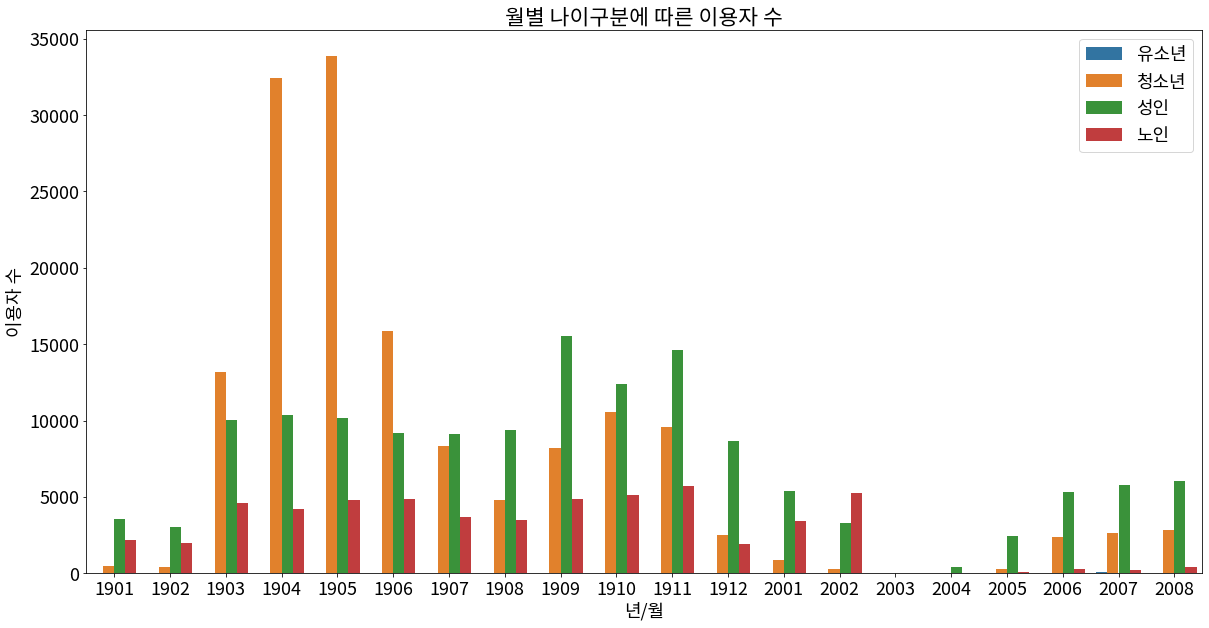

In [42]:
# 월별 이용자 분포
plt.figure(figsize=(20, 10))
sns.countplot(x='TEST_MONTH', hue='AGE_GBN', hue_order=['유소년', '청소년', '성인', '노인'], data=sttus_merged)
plt.xlabel('년/월')
plt.ylabel('이용자 수')
plt.title('월별 나이구분에 따른 이용자 수')
plt.legend()
plt.show()

`청소년` 이용자가 4, 5월에 폭발적으로 많았으나 코로나가 터지고 나서 청소년 이용자 수가 급격히 줄어들었고 `성인` 이용자는 꾸준히 있으며 9, 10, 11월에 잠깐 이용자 수가 늘었다고 겨울이 되어 줄어든다.

### 2.4. TEST_GBN
`TEST_GBN`은 출장여부를 나타낸다. 이 변수를 `IS_TRIP`인 이진 변수로 나타내어 쉬이 조작하도록 하였다. 우선 월별 출장 비율을 살펴보자.

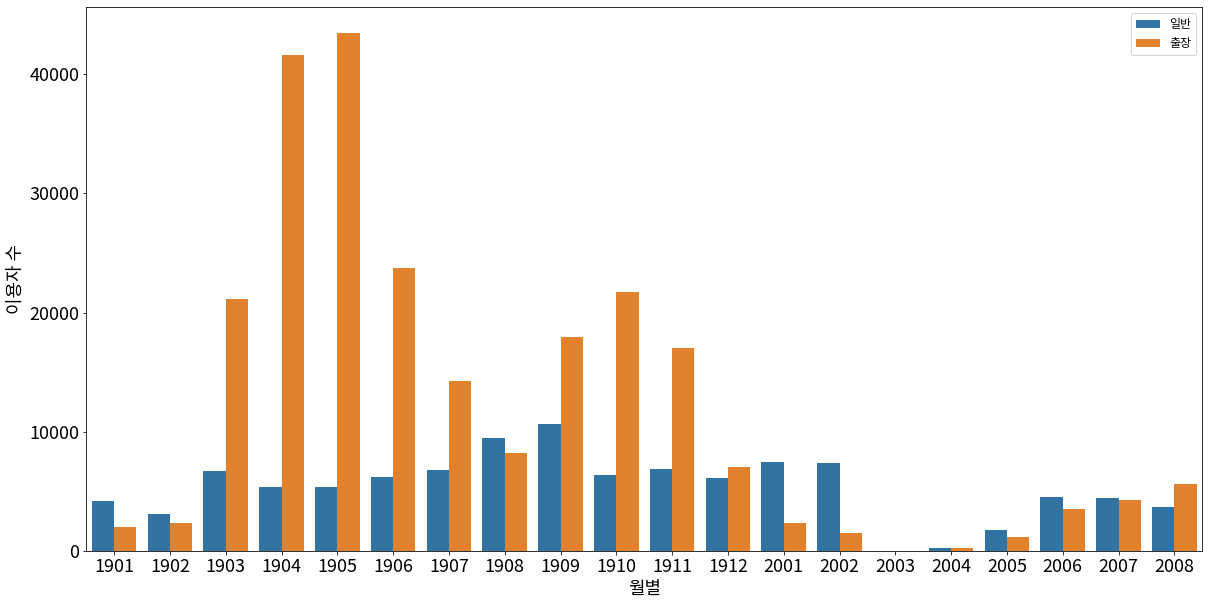

In [43]:
# 월별 출장 비율
plt.figure(figsize=(20, 10))
sns.countplot(x='TEST_MONTH', hue='TEST_GBN', hue_order=['일반', '출장'], data=sttus_merged)
plt.xlabel('월별')
plt.ylabel('이용자 수')
plt.legend(fontsize=12, loc='upper right')
plt.show()

코로나가 터지긴 전 비수기(여름/겨울)에는 센터를 내방하는 이용객이 많았으나 3, 4, 5, 9, 10, 11월에는 출장 이용률이 높은 것을 볼 수 있다. 코로나가 터진 후 다시 운영을 시작하던 5월에는 내방 고객의 비율이 높았으며 시간이 지날수록 출장 비율이 높아지는 것을 볼 수 있다.

마지막으로 지역별 출장 비율을 살펴보자.

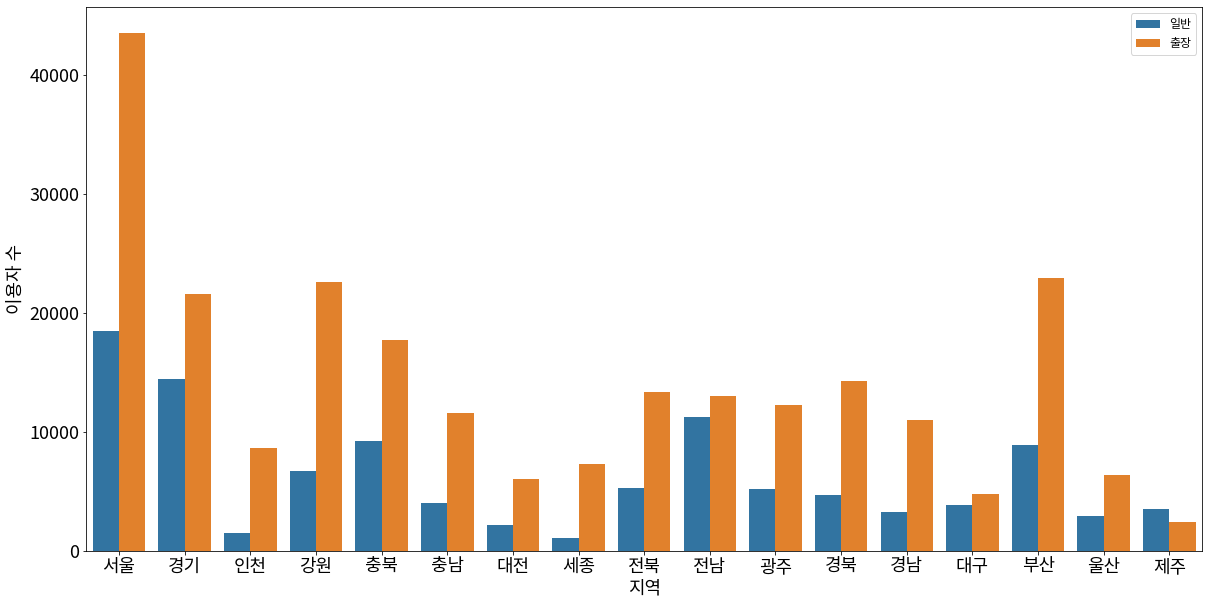

In [44]:
# 지역별 출장 비율
plt.figure(figsize=(20, 10))
sns.countplot(x='REGION', hue='TEST_GBN', hue_order=['일반', '출장'], data=sttus_merged, order=regions)
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.legend(['일반', '출장'], fontsize=12, loc='upper right')
plt.show()

대부분이 출방 비율이 높았으며 제주도는 내방 비율이 더 높았다. 코로나 이전과 이후의 차이를 살펴보자.

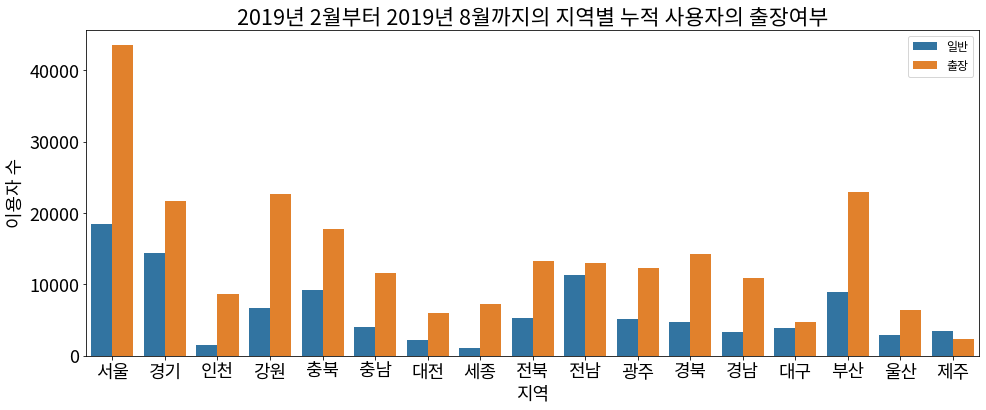

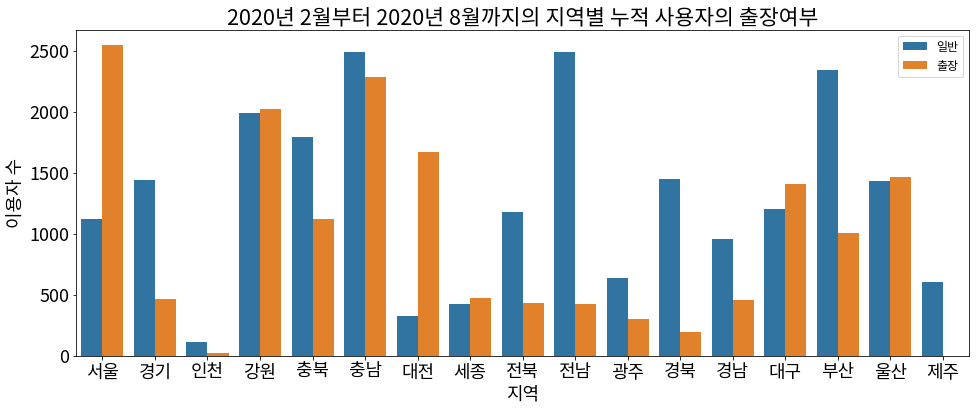

In [45]:
# 코로나 이전 출장 비율 분포
plt.figure(figsize=(16, 6))
sns.countplot(x='REGION', hue='TEST_GBN', hue_order=['일반', '출장'], data=sttus_pre, order=regions)
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2019년 2월부터 2019년 8월까지의 지역별 누적 사용자의 출장여부')
plt.legend(fontsize=12, loc='upper right')

# 코로나 이후 AGE_GBN 분포
plt.figure(figsize=(16, 6))
sns.countplot(x='REGION', hue='TEST_GBN', hue_order=['일반', '출장'], data=sttus_post, order=regions)
plt.xlabel('지역')
plt.ylabel('이용자 수')
plt.title('2020년 2월부터 2020년 8월까지의 지역별 누적 사용자의 출장여부')
plt.legend(fontsize=12, loc='upper right')

plt.show()

`서울`과 `대전`을 제외하고 대부분의 지역은 코로나 이후 내방객  비율이 높아진 것을 볼 수 있다. 코로나 이후 단체 신청이 불가능해 비율이 줄어든 것으로 보인다.

### 2.5. TEST_AGE
`TEST_AGE`는 측정나이이다. `AGE_GBN`으로 유소년, 청소년, 성인, 노인으로 나눴지만 성인의 나이 범위가 넓으므로 10단위로 나이를 나눠보고자 한다. 특히 어느 연령대의 이용객이 많은지를 살펴볼 수 있다.

In [46]:
sttus_merged.TEST_AGE.describe()

count    351771.000000
mean         33.211424
std          22.239124
min          11.000000
25%          16.000000
50%          21.000000
75%          53.000000
max         104.000000
Name: TEST_AGE, dtype: float64

이용개의 최저 나이는 11살, 최고 나이는 104살인 것을 볼 수 있다. 평균이 33살인 것으로 보아 나이가 좀 있는 이용객보다는 젊은 층이 이용을 더 한다는 것을 볼 수 있다.

나이대를 확인하기 전에 10대, 20대, 30대, 40대, 50대, 60대, 70대 이상으로 나누고자 한다. 데이터의 75%에 있는 이용자의 나이가 53세인 것을 보아 70대 이상까지 고려할 필요는 없어보인다. 참고로 다음을 고려한다.
- `TEST_AGE`는 만 나이이다.
- 유소년과 청소년을 합쳤을 때 최저 나이는 11, 최고 나이는 18이다. 그 중 75%가 17세이다.
- 성인의 최저 나이는 18, 최고 나이는 65이다.

In [47]:
# TEST_AGE를 10 단위로 카테고리화
def get_age_range(age):
    cat = 0
    if age < 18:
        cat = 10
    elif age < 28:
        cat = 20
    elif age < 38:
        cat = 30
    elif age < 48:
        cat = 40
    elif age < 58:
        cat = 50
    else:
        cat = 60
    
    return cat

In [48]:
sttus_merged['AGE_BIN'] = sttus_merged['TEST_AGE'].apply(lambda x:get_age_range(x))
sttus_merged['AGE_BIN'].describe()

count    351771.000000
mean         28.475798
std          20.019568
min          10.000000
25%          10.000000
50%          20.000000
75%          50.000000
max          60.000000
Name: AGE_BIN, dtype: float64

In [49]:
# 나머지 데이터프레임에도 적용
sttus_pre['AGE_BIN'] = sttus_pre['TEST_AGE'].apply(lambda x:get_age_range(x))
sttus_post['AGE_BIN'] = sttus_post['TEST_AGE'].apply(lambda x:get_age_range(x))

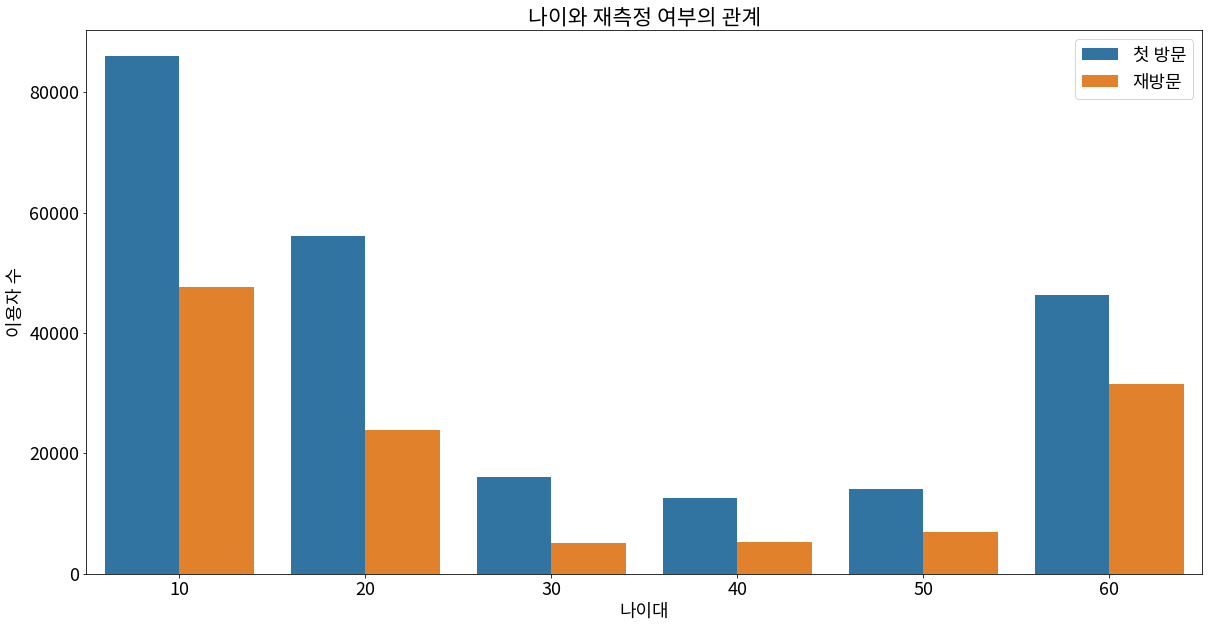

In [50]:
# 재측정 여부와 나이대와의 관계
plt.figure(figsize=(20, 10))
sns.countplot(x='AGE_BIN', hue='IS_REVISIT', data=sttus_merged)
plt.xlabel('나이대')
plt.ylabel('이용자 수')
plt.title('나이와 재측정 여부의 관계')
plt.legend(['첫 방문', '재방문'], loc='upper right')
plt.show()

나이가 많아질수록 재방문율이 높다. 여기에 출장 여부까지 같이 고려해보자.

우선 10대의 출장비율이 제일 높은 것을 볼 수 있다. 

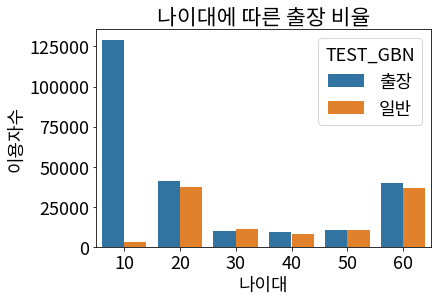

In [51]:
sns.countplot(x='AGE_BIN', hue='TEST_GBN', data=sttus_merged)
plt.xlabel('나이대')
plt.ylabel('이용자수')
plt.title('나이대에 따른 출장 비율')
plt.show()

In [148]:
temp = sttus_merged[sttus_merged.TEST_GBN=='일반']
df_temp = pd.DataFrame(temp.AGE_BIN.value_counts())
totals = df_temp.AGE_BIN.sum()
df_temp.head()

,AGE_BIN
20,37420
60,36734
30,11030
50,10181
40,8297


In [149]:
df_temp['TEMP'] = df_temp['AGE_BIN']/totals*100
df_temp.head()

,AGE_BIN,TEMP
20,37420,35.127245
60,36734,34.483277
30,11030,10.354183
50,10181,9.557201
40,8297,7.788636


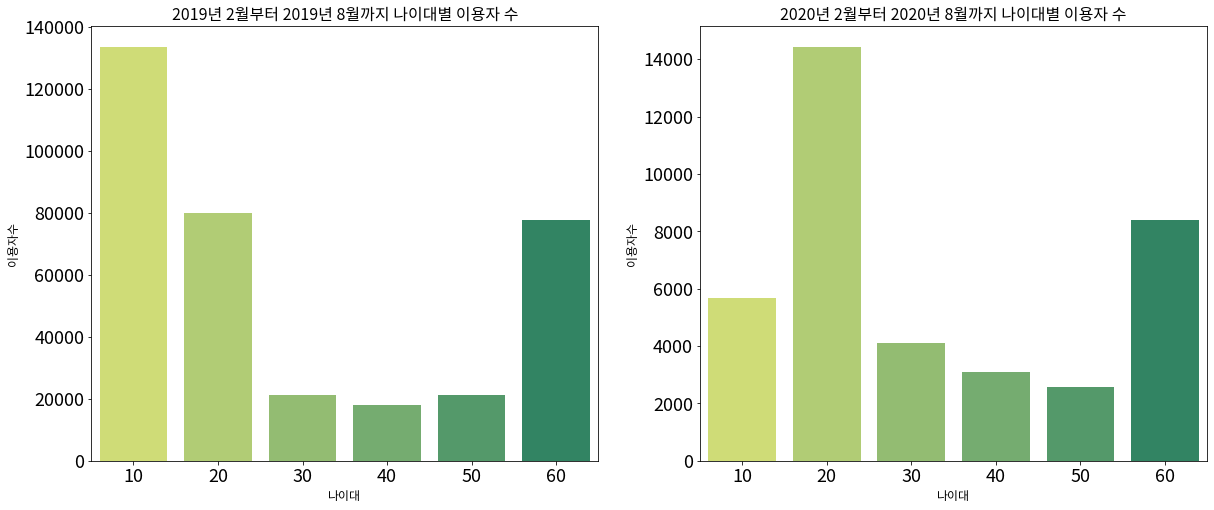

In [52]:
plt.subplots(1, 2, figsize=(20, 8))

# 코로나 전
plt.subplot(1, 2, 1)
sns.countplot(x='AGE_BIN', data=sttus_pre, palette='summer_r')
plt.xlabel('나이대', fontsize=12)
plt.ylabel('이용자수', fontsize=12)
plt.title('2019년 2월부터 2019년 8월까지 나이대별 이용자 수', fontsize=16)

# 코로나 후
plt.subplot(1, 2, 2)
sns.countplot(x='AGE_BIN', data=sttus_post, palette='summer_r')
plt.xlabel('나이대', fontsize=12)
plt.ylabel('이용자수', fontsize=12)
plt.title('2020년 2월부터 2020년 8월까지 나이대별 이용자 수', fontsize=16)

plt.show()

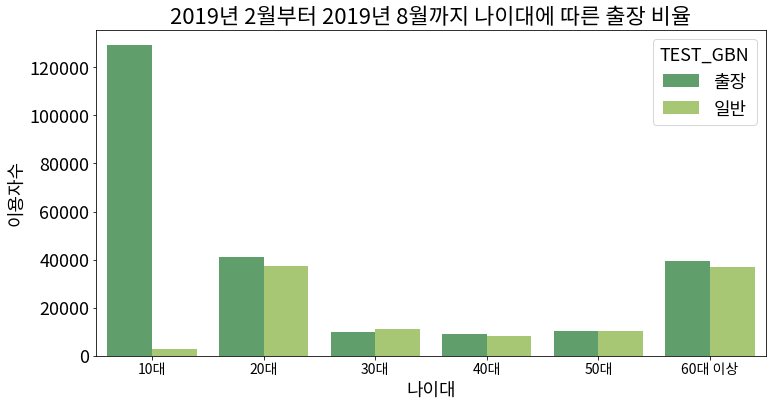

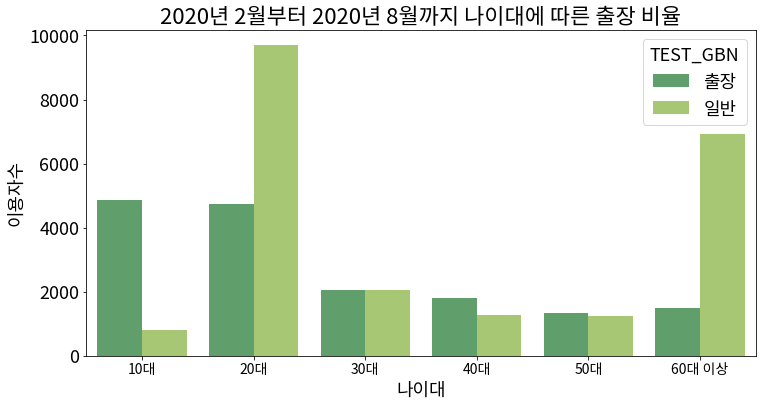

In [53]:
# 코로나 전
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE_BIN', hue='TEST_GBN', data=sttus_pre, hue_order=['출장', '일반'], palette='summer')
plt.xticks(np.arange(6), labels=['10대', '20대', '30대', '40대', '50대', '60대 이상'], fontsize=14)
plt.xlabel('나이대', fontsize=18)
plt.ylabel('이용자수', fontsize=18)
plt.title('2019년 2월부터 2019년 8월까지 나이대에 따른 출장 비율', fontsize=22)

# 코로나 후
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE_BIN', hue='TEST_GBN', data=sttus_post, hue_order=['출장', '일반'], palette='summer')
plt.xticks(np.arange(6), labels=['10대', '20대', '30대', '40대', '50대', '60대 이상'], fontsize=14)
plt.xlabel('나이대', fontsize=18)
plt.ylabel('이용자수', fontsize=18)
plt.title('2020년 2월부터 2020년 8월까지 나이대에 따른 출장 비율', fontsize=22)

plt.show()

30, 40 50대는 출장 비율은 코로나 전이나 후나 크게 차이가 나지 않는다. 반면 다른 나이대는 큰 차이를 보인다.
- 10대는 출장 비율이 높기는 하지만 출장 비율이 줄어들고 일반 비율이 늘어났다.
- 20대는 일반 비율이 급격하게 들었다.
- 60대는 일반 비율이 더 증가하였다.
- 70대는 출장 비율이 조금 더 높았으나 코로나 이후 일반 비율이 급격히 늘어났다.

In [54]:
# 코로나 이전 + 일반
print('코로나 이전 10대 일반의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==10)&(sttus_pre['TEST_GBN']=='일반'), 'TEST_AGE'].mean())
print('코로나 이전 20대 일반의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==20)&(sttus_pre['TEST_GBN']=='일반'), 'TEST_AGE'].mean())
print('코로나 이전 60대 일반의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==60)&(sttus_pre['TEST_GBN']=='일반'), 'TEST_AGE'].mean())
print('코로나 이전 70대 일반의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==70)&(sttus_pre['TEST_GBN']=='일반'), 'TEST_AGE'].mean())

print('-'*60)

# 코로나 이전 + 출장
print('코로나 이전 10대 출장의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==10)&(sttus_pre['TEST_GBN']=='출장'), 'TEST_AGE'].mean())
print('코로나 이전 20대 출장의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==20)&(sttus_pre['TEST_GBN']=='출장'), 'TEST_AGE'].mean())
print('코로나 이전 60대 출장의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==60)&(sttus_pre['TEST_GBN']=='출장'), 'TEST_AGE'].mean())
print('코로나 이전 70대 출장의 나이 평균 :', sttus_pre.loc[(sttus_pre['AGE_BIN']==70)&(sttus_pre['TEST_GBN']=='출장'), 'TEST_AGE'].mean())

코로나 이전 10대 일반의 나이 평균 : 15.377661431064572
코로나 이전 20대 일반의 나이 평균 : 22.077899518973812
코로나 이전 60대 일반의 나이 평균 : 67.87570098546306
코로나 이전 70대 일반의 나이 평균 : nan
------------------------------------------------------------
코로나 이전 10대 출장의 나이 평균 : 15.049880040244563
코로나 이전 20대 출장의 나이 평균 : 20.430877827170143
코로나 이전 60대 출장의 나이 평균 : 71.27556049844551
코로나 이전 70대 출장의 나이 평균 : nan


In [55]:
# 코로나 이후 + 일반
print('코로나 이후 10대 일반의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==10)&(sttus_post['TEST_GBN']=='일반'), 'TEST_AGE'].mean())
print('코로나 이후 20대 일반의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==20)&(sttus_post['TEST_GBN']=='일반'), 'TEST_AGE'].mean())
print('코로나 이후 60대 일반의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==60)&(sttus_post['TEST_GBN']=='일반'), 'TEST_AGE'].mean())
print('코로나 이후 70대 일반의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==70)&(sttus_post['TEST_GBN']=='일반'), 'TEST_AGE'].mean())

print('-'*60)

# 코로나 이후 + 출장
print('코로나 이후 10대 출장의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==10)&(sttus_post['TEST_GBN']=='출장'), 'TEST_AGE'].mean())
print('코로나 이후 20대 출장의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==20)&(sttus_post['TEST_GBN']=='출장'), 'TEST_AGE'].mean())
print('코로나 이후 60대 출장의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==60)&(sttus_post['TEST_GBN']=='출장'), 'TEST_AGE'].mean())
print('코로나 이후 70대 출장의 나이 평균 :', sttus_post.loc[(sttus_post['AGE_BIN']==70)&(sttus_post['TEST_GBN']=='출장'), 'TEST_AGE'].mean())

코로나 이후 10대 일반의 나이 평균 : 16.147459727385378
코로나 이후 20대 일반의 나이 평균 : 20.623427510826975
코로나 이후 60대 일반의 나이 평균 : 68.84735472679965
코로나 이후 70대 일반의 나이 평균 : nan
------------------------------------------------------------
코로나 이후 10대 출장의 나이 평균 : 15.915964659954797
코로나 이후 20대 출장의 나이 평균 : 20.346064570584513
코로나 이후 60대 출장의 나이 평균 : 69.23908663532572
코로나 이후 70대 출장의 나이 평균 : nan


도드라진 차이는 보이지 않지만, 10대를 제외하고는 대부분의 나이대의 젊은 층이 검사를 받는 것을 알 수 있으며 특히 20대의 겨우 젊은 층이 이 서비스를 이용한다는 것을 볼 수 있다.

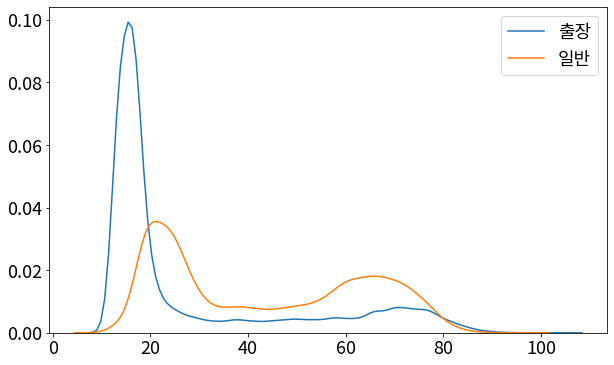

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 출장 여부의 나이 분포
sns.kdeplot(sttus_merged[sttus_merged['TEST_GBN']=='출장']['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['TEST_GBN']=='일반']['TEST_AGE'], ax=ax)

plt.legend(['출장', '일반'])
plt.show()

20대를 기점으로 출장보다는 일반 비율이 증가하며 20대 초반을 지나면서 일반 비율이 급격히 줄어들고 60대에 들어서서 일반 비율이 다시 증가하는 것을 볼 수 있다.

위의 그래프를 코로나 전과 코로나 후로 비교해보자.

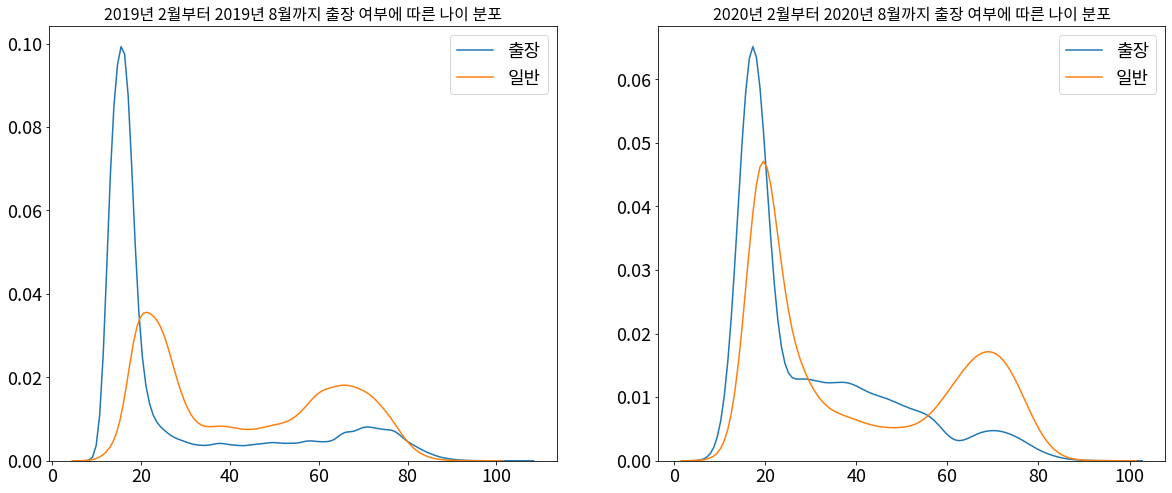

In [57]:
plt.subplots(1, 2, figsize=(20, 8))

# 코로나 전
plt.subplot(1, 2, 1)
sns.kdeplot(sttus_pre[sttus_pre['TEST_GBN']=='출장']['TEST_AGE'])
sns.kdeplot(sttus_pre[sttus_pre['TEST_GBN']=='일반']['TEST_AGE'])
plt.legend(['출장', '일반'])
plt.title('2019년 2월부터 2019년 8월까지 출장 여부에 따른 나이 분포', fontsize=16)

# 코로나 후
plt.subplot(1, 2, 2)
sns.kdeplot(sttus_post[sttus_post['TEST_GBN']=='출장']['TEST_AGE'])
sns.kdeplot(sttus_post[sttus_post['TEST_GBN']=='일반']['TEST_AGE'])
plt.legend(['출장', '일반'])
plt.title('2020년 2월부터 2020년 8월까지 출장 여부에 따른 나이 분포', fontsize=16)

plt.show()

- 코로나 이전의 대부분의 출장 비율은 10대가 차지하고 있다.
- 코로나 이전의 일반 비율은 20대와 60대가 차지하고 있다.
- 코로나 이후 출장 비율은 10대가 가장 높기는 하지만 그 이후 나이대의 비율이 조금 증가하였다.
- 코로나 이후 20대와 60대의 일반 분포가 도드라지게 증가하였다.

마지막으로 시간별 나이대 분포를 살펴보자.

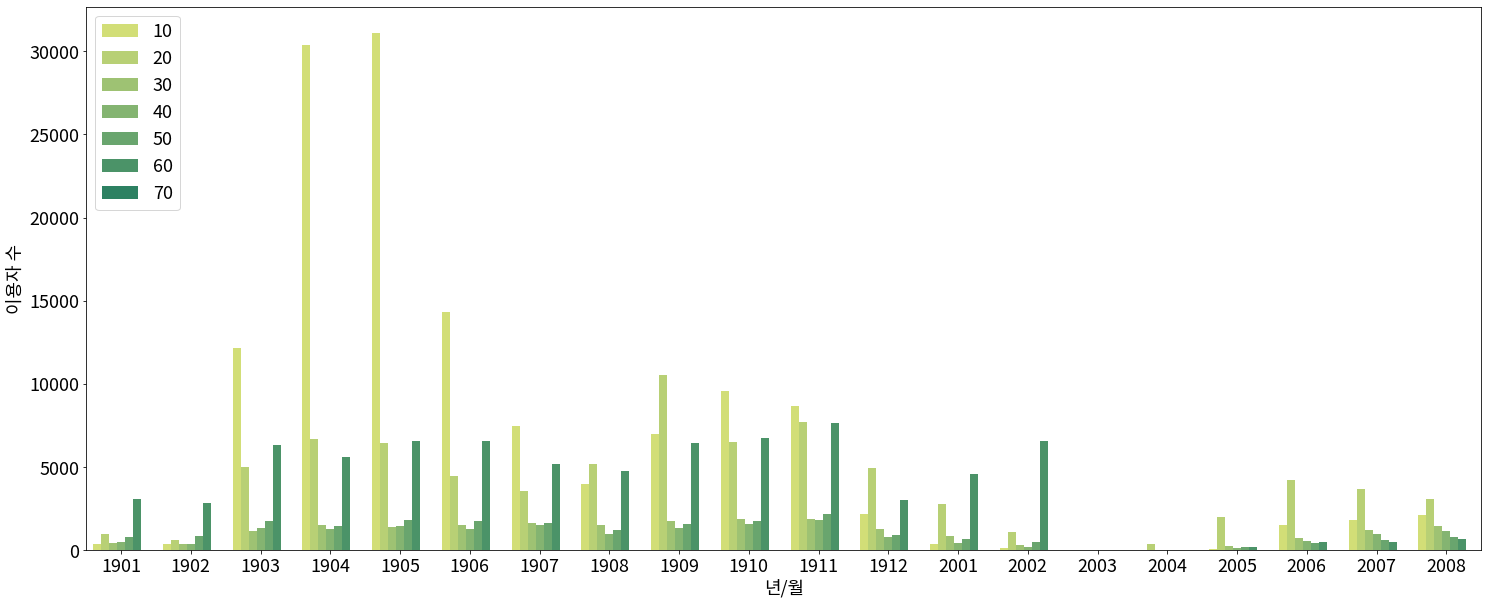

In [58]:
# 월별 이용자 나이 분포
plt.figure(figsize=(25, 10))
sns.countplot(x='TEST_MONTH', hue='AGE_BIN', hue_order=[10, 20, 30, 40, 50, 60, 70], data=sttus_merged, palette='summer_r')
plt.xlabel('년/월')
plt.ylabel('이용자 수')
plt.legend()
plt.show()

<Figure size 1800x720 with 0 Axes>

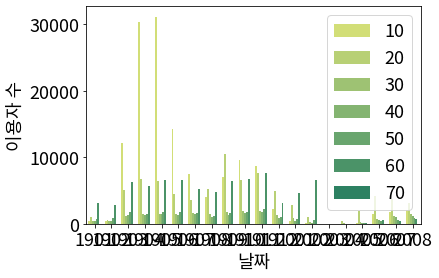

In [59]:
# 월별 이용자 나이 분포
plt.figure(figsize=(25, 10))
plt.subplots()
sns.countplot(x='TEST_MONTH', hue='AGE_BIN', hue_order=[10, 20, 30, 40, 50, 60, 70], data=sttus_merged, palette='summer_r')
plt.xlabel('날짜')
plt.ylabel('이용자 수')
plt.legend()
plt.show()

출장이 아닌 일반 이용자들의 나이 분포를 살펴보자.

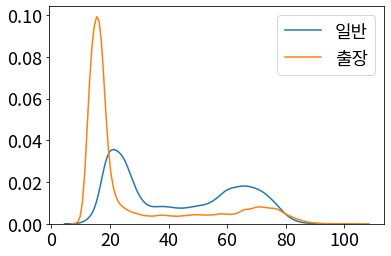

In [60]:
personals = sttus_merged[sttus_merged.TEST_GBN=='일반']
trips = sttus_merged[sttus_merged.TEST_GBN=='출장']
sns.kdeplot(personals['TEST_AGE'])
sns.kdeplot(trips['TEST_AGE'])
plt.legend(['일반', '출장'])
plt.show()

### 2.6. INPUT_GBN
`INPUT_GBN`은 입력 구분을 말한다. `INPUT_GBN`은 관리자 혹은 인바디이다.

In [61]:
sttus_merged.INPUT_GBN.value_counts()

관리자    314360
인바디     30159
Name: INPUT_GBN, dtype: int64

대부분이 `관리자`인 것을 확인할 수 있다. 정확히 이것이 무엇을 의미하는지는 모르지만 **연령별, 지역별** 분포를 살펴보자.

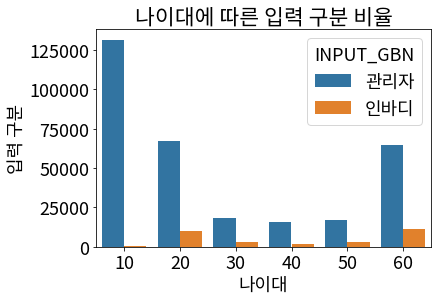

In [62]:
sns.countplot(x='AGE_BIN', hue='INPUT_GBN', data=sttus_merged)
plt.xlabel('나이대')
plt.ylabel('입력 구분')
plt.title('나이대에 따른 입력 구분 비율')
plt.show()

- 10대의 경우 대부분이 `관리자`이다.
- 20대의 경우 `인바디` 비율이 크다.
- 30, 40, 50대의 경우 비율이 비슷하고 60대와 70대는 관리자의 비율이 조금 더 높다.

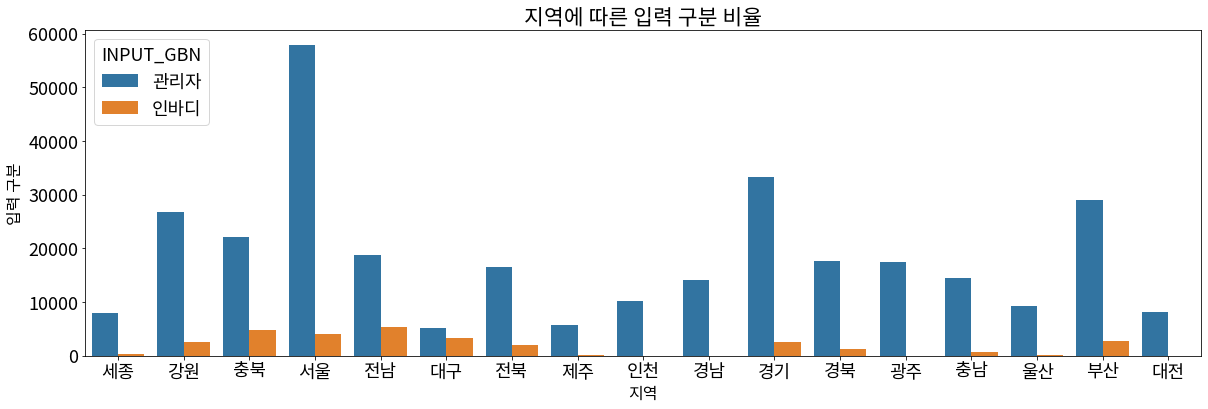

In [63]:
plt.figure(figsize=(20, 6))
sns.countplot(x='REGION', hue='INPUT_GBN', data=sttus_merged)
plt.xlabel('지역', fontsize=16)
plt.ylabel('입력 구분', fontsize=16)
plt.title('지역에 따른 입력 구분 비율')
plt.show()

대부분이 `관리자` 비율이 높다. 세종, 제주, 인천, 경남, 광주, 충남, 울산, 대전을 제외하고는 `인바디`가 어느 정도 존재한다.

### 2.7. CERT_GBN
`CERT_GBN`은 상장 비율을 말한다. 금상, 은상, 동상, 참가상이 있다. 이를 나이와 지역, 측정횟수 관점에서 봐보자.

In [64]:
sttus_merged.CERT_GBN.value_counts()

참가상    208428
동상      76207
은상      46663
금상      20473
Name: CERT_GBN, dtype: int64

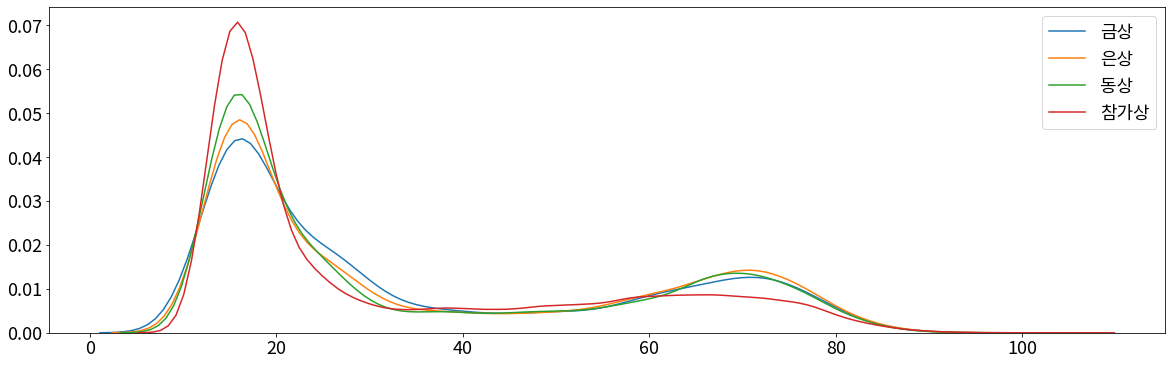

In [65]:
# 상의 종류별 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='금상']['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='은상']['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='동상']['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='참가상']['TEST_AGE'], ax=ax)
plt.legend(['금상', '은상', '동상', '참가상'])
plt.show()

참가상을 제외하고 금, 은, 동상의 비율을 먼저 봐보자.

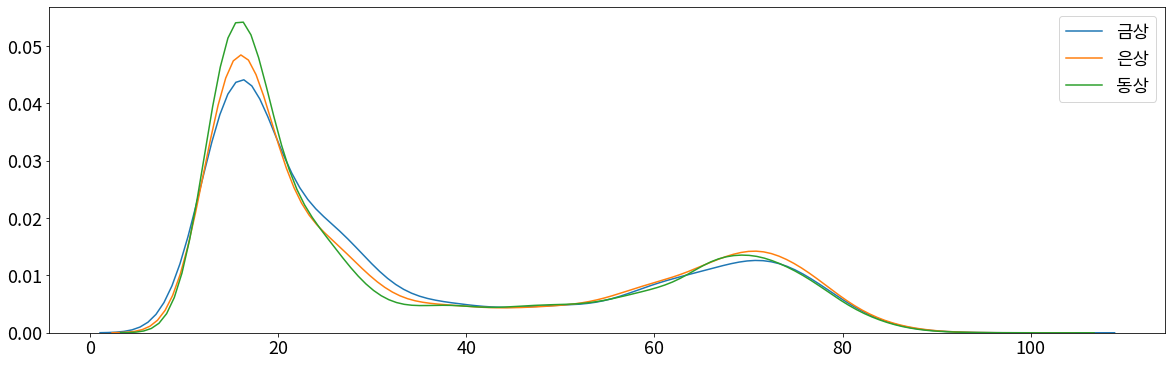

In [66]:
# 상의 종류별 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='금상']['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='은상']['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='동상']['TEST_AGE'], ax=ax)
plt.legend(['금상', '은상', '동상'])
plt.show()

대부분의 금상은 20대가 가져가는 것을 볼 수 있다. 물론 동상, 은상도 마찬가지다. 반면 나머지 나이대는 골고루 가져가는 것을 볼 수 있다.

이번에는 상과 참가상 여부를 살펴보자.

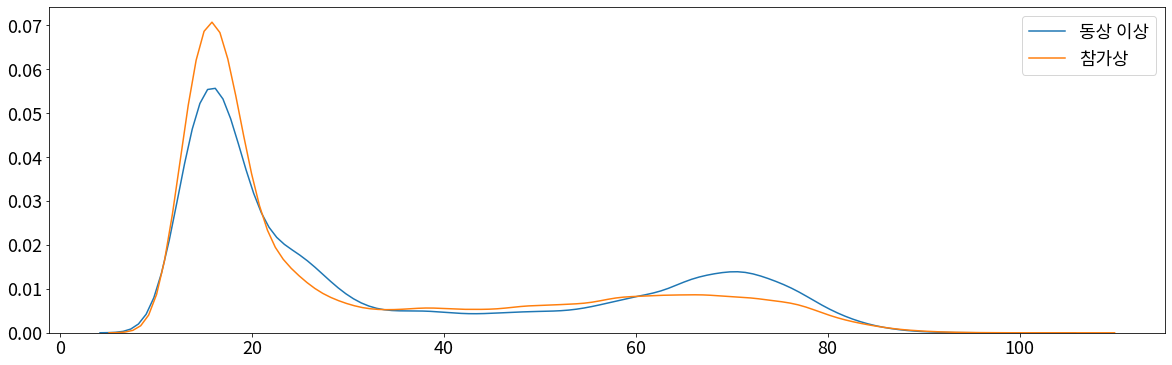

In [67]:
# 상의 종류별 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.kdeplot(sttus_merged[(sttus_merged['CERT_GBN']=='금상')|(sttus_merged['CERT_GBN']=='은상')|(sttus_merged['CERT_GBN']=='동상')]['TEST_AGE'], ax=ax)
sns.kdeplot(sttus_merged[sttus_merged['CERT_GBN']=='참가상']['TEST_AGE'], ax=ax)
plt.legend(['동상 이상', '참가상'])
plt.show()

참가상도 마찬가지이다. 참가상도 젊은 층이 많이 가지고 간다. 이제 각 나이대별 상별 분포를 살펴보자.

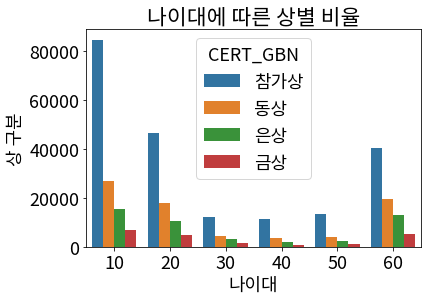

In [68]:
sns.countplot(x='AGE_BIN', hue='CERT_GBN', data=sttus_merged, hue_order=['참가상', '동상', '은상', '금상'])
plt.xlabel('나이대')
plt.ylabel('상 구분')
plt.title('나이대에 따른 상별 비율')
plt.show()

모든 나이대가 `참가상`, `동상`, `은상`, `금상` 순으로 많이 받고 있으며, 젊은 층의 `참가상` 비율이 더 도드라진다. 나이대가 높아질수록 동상, 은상, 금상의 비율이 늘어나고 있다.

이제는 지역별 상 비율을 살펴보자.

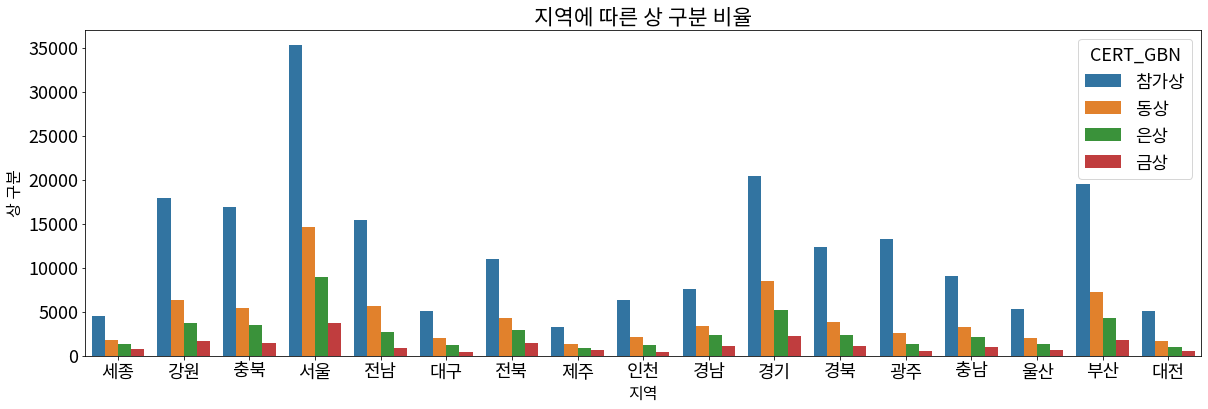

In [69]:
plt.figure(figsize=(20, 6))
sns.countplot(x='REGION', hue='CERT_GBN', data=sttus_merged, hue_order=['참가상', '동상', '은상', '금상'])
plt.xlabel('지역', fontsize=16)
plt.ylabel('상 구분', fontsize=16)
plt.title('지역에 따른 상 구분 비율')
plt.show()

모든 지역이 다 비슷한 것으로 보인다. 상으로 지역별 특징을 구분하는 것은 쉬워보이지는 않다.

마지막으로 재방문 여부에 따라 상의 분포가 달라지는지 살펴보자.

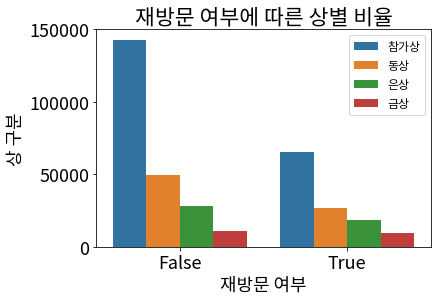

In [70]:
sns.countplot(x='IS_REVISIT', hue='CERT_GBN', data=sttus_merged, hue_order=['참가상', '동상', '은상', '금상'])
plt.xlabel('재방문 여부')
plt.ylabel('상 구분')
plt.title('재방문 여부에 따른 상별 비율')
plt.legend(fontsize=12)
plt.show()

보통 첫 방문자의 경우 `참가상` 비율니 높은 것을 볼 수 있다. 재방문을 할수록 `참가상`보다는 `동`, `은`, `금상` 비율이 더 높아지는 것으로 보인다.

코로나 이전과 이후의 상 분포는 다를까? 한 번 살펴보자.

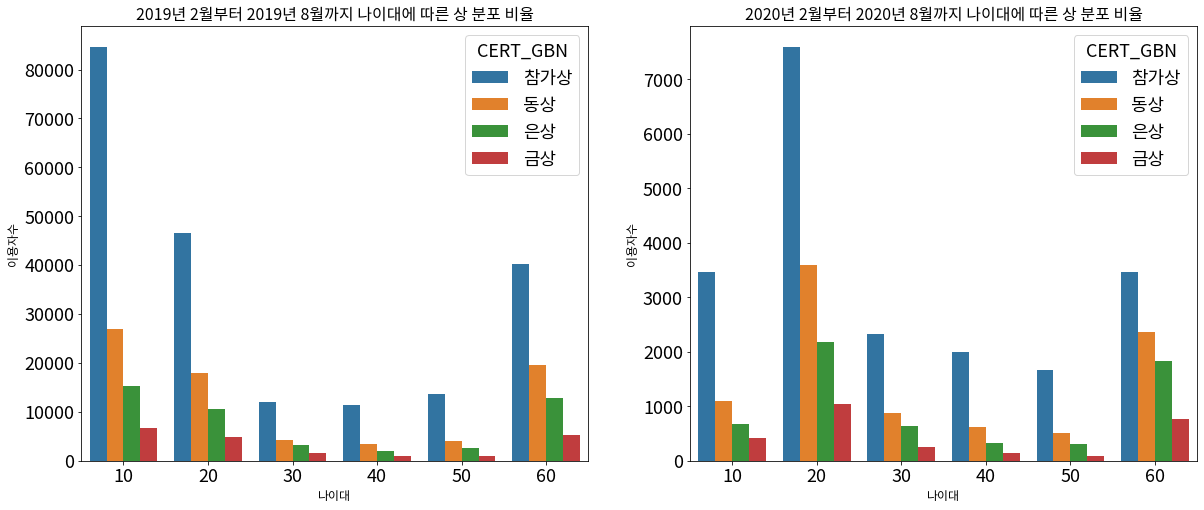

In [71]:
plt.subplots(1, 2, figsize=(20, 8))

# 코로나 전
plt.subplot(1, 2, 1)
sns.countplot(x='AGE_BIN', hue='CERT_GBN', data=sttus_pre, hue_order=['참가상', '동상', '은상', '금상'])
plt.xlabel('나이대', fontsize=12)
plt.ylabel('이용자수', fontsize=12)
plt.title('2019년 2월부터 2019년 8월까지 나이대에 따른 상 분포 비율', fontsize=16)

# 코로나 후
plt.subplot(1, 2, 2)
sns.countplot(x='AGE_BIN', hue='CERT_GBN', data=sttus_post, hue_order=['참가상', '동상', '은상', '금상'])
plt.xlabel('나이대', fontsize=12)
plt.ylabel('이용자수', fontsize=12)
plt.title('2020년 2월부터 2020년 8월까지 나이대에 따른 상 분포 비율', fontsize=16)

plt.show()

마지막으로 시간별 상의 분포를 살펴보자.

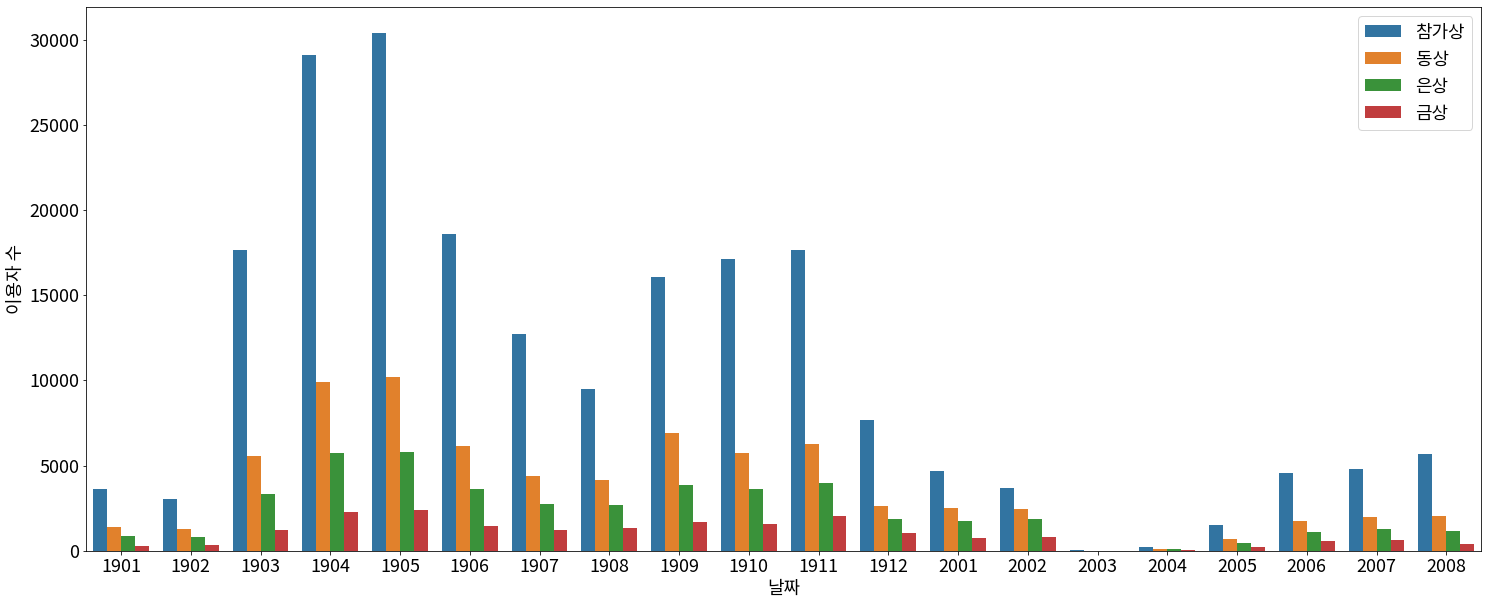

In [72]:
# 월별 이용자 나이 분포
plt.figure(figsize=(25, 10))
sns.countplot(x='TEST_MONTH', hue='CERT_GBN', hue_order=['참가상', '동상', '은상', '금상'], data=sttus_merged)
plt.xlabel('날짜')
plt.ylabel('이용자 수')
plt.legend()
plt.show()

### 2.8. TEST_YMD
`TEST_YMD`는 측정일을 말한다. 측정 세부날짜까지는 고려할 수 없고 월로 한 번 구분해서 살펴보자. 

우선 월별 이용자 수는 다음과 같다.

In [73]:
date, users = [], []

for df in sttus:
    date.append(str(df.loc[0, 'TEST_YMD'])[:6])
    users.append(df.shape[0])
    
monthly_user = pd.DataFrame({'date': date, 'users': users})
monthly_user.head()

,date,users
0,201901,6187
1,201902,5447
2,201903,27804
3,201904,46988
4,201905,48836


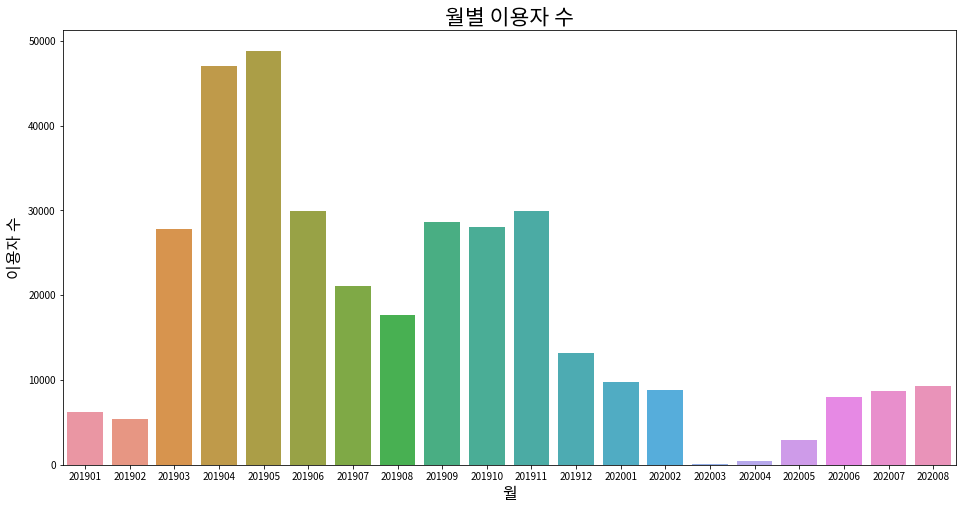

In [74]:
plt.figure(figsize=(16, 8))
sns.barplot(x='date', y='users', data=monthly_user)
plt.xlabel('월', fontsize=16)
plt.ylabel('이용자 수', fontsize=16)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('월별 이용자 수')
plt.show()

작년 사용자 수와 비교했을 때 많이 줄어든 것을 볼 수 있다.
다른 컬럼과의 관계는 위에 명시해놨으니 여기서 끝내고 마지막으로 성별을 살펴보자.

작년 이용자 수와 비교했을 때 이용자 수가 많이 줄어든 것을 볼 수 있다.

### 2.9. TEST_SEX

In [75]:
sttus_merged.TEST_SEX.value_counts()

M    187495
F    164276
Name: TEST_SEX, dtype: int64

우선 지역별 성별 분포를 살펴보자.

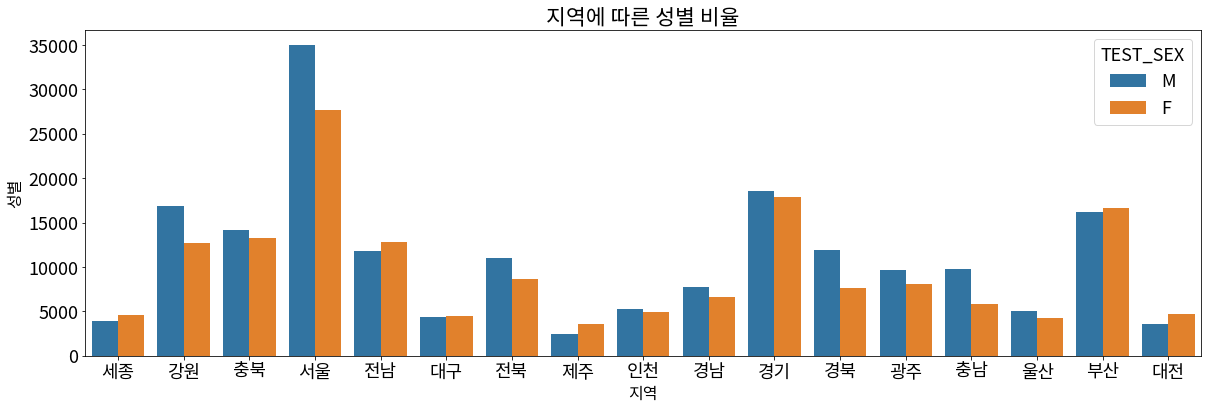

In [76]:
plt.figure(figsize=(20, 6))
sns.countplot(x='REGION', hue='TEST_SEX', data=sttus_merged, hue_order=['M', 'F'])
plt.xlabel('지역', fontsize=16)
plt.ylabel('성별', fontsize=16)
plt.title('지역에 따른 성별 비율')
plt.show()

대부분 비슷해 보이지만 세종, 전남, 제주, 부산, 대전의 경우 여성의 비율이 조금 더 많다.

그 다음으로 나이대별 성별 분포를 살펴보자.

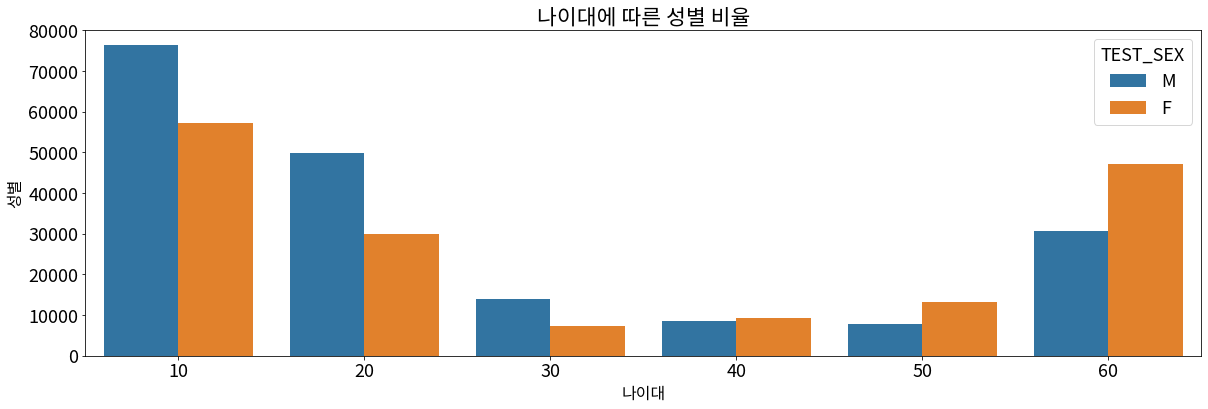

In [77]:
plt.figure(figsize=(20, 6))
sns.countplot(x='AGE_BIN', hue='TEST_SEX', data=sttus_merged, hue_order=['M', 'F'])
plt.xlabel('나이대', fontsize=16)
plt.ylabel('성별', fontsize=16)
plt.title('나이대에 따른 성별 비율')
plt.show()

나이대가 높아질수록 여성의 비율이 높아지는 것을 볼 수 있다.

우리는 코로나 이후 개인적인 사용자가 더 많고 그 중 20대 군 가산점을 위해 보는 사람들이 많을 것이라 보고 있다. 즉, 20대 남성 비율이 더 높을 것이라 보고 있는데 그 차이를 한 번 살펴보자.

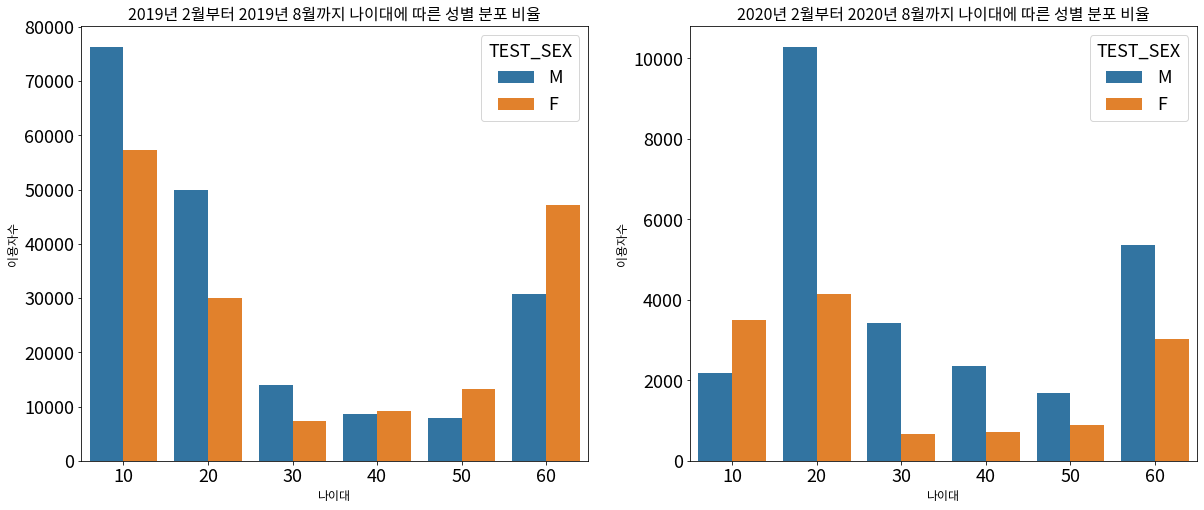

In [78]:
plt.subplots(1, 2, figsize=(20, 8))

# 코로나 전
plt.subplot(1, 2, 1)
sns.countplot(x='AGE_BIN', hue='TEST_SEX', data=sttus_pre, hue_order=['M', 'F'])
plt.xlabel('나이대', fontsize=12)
plt.ylabel('이용자수', fontsize=12)
plt.title('2019년 2월부터 2019년 8월까지 나이대에 따른 성별 분포 비율', fontsize=16)

# 코로나 후
plt.subplot(1, 2, 2)
sns.countplot(x='AGE_BIN', hue='TEST_SEX', data=sttus_post, hue_order=['M', 'F'])
plt.xlabel('나이대', fontsize=12)
plt.ylabel('이용자수', fontsize=12)
plt.title('2020년 2월부터 2020년 8월까지 나이대에 따른 성별 분포 비율', fontsize=16)

plt.show()

우리가 예상했던 대로 20대의 남성 비율이 급격히 늘은 것을 볼 수 있다.

## 3. 지역별 이용자 특성 분석

월별로 이용자의 분포가 다르므로 **일반**인 데이터를 뽑아 월별로 나눠보자.

In [186]:
month1 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1901)]
month2 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1902)]
month3 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1903)]
month4 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1904)]
month5 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1905)]
month6 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1906)]
month7 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1907)]
month8 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1908)]
month9 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1909)]
month10 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1910)]
month11 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1911)]
month12 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']==1912)]

sttus_month = [month1, month2, month3, month4, month5, month6, month7, month8, month9, month10, month11, month12]
sttus_2019 = sttus_merged.loc[(sttus_merged['TEST_GBN']=='일반')&(sttus_merged['TEST_MONTH']<2001)]

In [187]:
sttus_2019.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,IS_CORONA,IS_TRIP,IS_REVISIT,REGION,TEST_MONTH,AGE_BIN
3,4,청주,성인,일반,61,인바디,참가상,20190103,F,False,False,True,충북,1901,60
8,1,KSPO송파,노인,일반,66,관리자,참가상,20190103,M,False,False,False,서울,1901,60
9,1,노원,노인,일반,74,인바디,참가상,20190103,F,False,False,False,서울,1901,60
13,1,노원,성인,일반,60,인바디,동상,20190103,F,False,False,False,서울,1901,60
14,1,금천,성인,일반,33,관리자,참가상,20190103,F,False,False,False,서울,1901,30


In [188]:
sttus_2019[['AGE_BIN', 'TEST_SEX', 'CENTER_NM']].groupby('CENTER_NM').count()

,AGE_BIN,TEST_SEX
CENTER_NM,,
KSPO송파,2892,2892
KSPO송파(출장),100,100
KSPO아산,310,310
KSPO아산(출장),1,1
강릉,513,513
계룡,191,191
곡성,1604,1604
광산,947,947
구미,311,311


우선 다음과 같이 나눠서 살펴보자.
- 20대와 60대의 비율
- 남녀비율과 20대의 비율
- 남녀비율과 60대의 비율

이 3가지를 가지고 나눠본 뒤 잘 나눠지는 것을 살펴보자.

In [189]:
total = [center for center in total if '출장' not in center]
total.sort()
print(total)

['KSPO광주', 'KSPO대구', 'KSPO송파', 'KSPO아산', '강릉', '경산', '계룡', '고양', '곡성', '광산', '광주', '구미', '군산', '금천', '김천', '나주', '남구(부산)', '남구(울산)', '남원', '노원', '달서', '동구(광주)', '동작', '마포', '목포', '부천', '북구(광주)', '북구(부산)', '사상', '사천', '사하', '삼척', '서구(대전)', '서초', '성남', '성동', '세종', '순천', '스포원(금정)', '시흥', '안동', '연수', '영동', '영암', '영주', '오산', '원주', '의정부', '익산', '전주', '정읍', '제주', '증평', '진천', '창원', '창원마산회원', '천안', '청주', '춘천', '충주', '태백', '포천', '포항', '화성']


In [190]:
len(sttus_2019[sttus_2019.CENTER_NM=='KSPO광주'])

0

In [191]:
def sttus_to_df(sttus):
    global total
    
    # 이름에 출장이 포함된 센터 제거 (매우 소수)
    drop_idx = sttus[sttus['CENTER_NM'].str.contains("출장")].index
    sttus = sttus.drop(drop_idx)
    
    # 각 센터별 20대, 60대, 남녀 비율
    idx, data = [], []
    for center in total:
        temp = sttus[sttus['CENTER_NM'] == center]
        
        if not len(temp):
            continue
        
        total_people = temp['AGE_BIN'].count()
        total_twenties = temp[temp['AGE_BIN'] == 20]['AGE_BIN'].count()
        total_sixties = temp[(temp['AGE_BIN'] == 60)|(temp['AGE_BIN'] == 70)]['AGE_BIN'].count()
        total_male = temp[temp['TEST_SEX'] == 'M']['TEST_SEX'].count()
        total_female = temp[temp['TEST_SEX'] == 'F']['TEST_SEX'].count()
        total_20_male = temp[(temp['AGE_BIN']==20)&(temp['TEST_SEX']=='M')]['AGE_GBN'].count()
        total_20_female = temp[(temp['AGE_BIN']==20)&(temp['TEST_SEX']=='F')]['AGE_GBN'].count()
        total_60_male = temp[((temp['AGE_BIN']==60)|(temp['AGE_BIN'] == 70))&(temp['TEST_SEX']=='M')]['AGE_GBN'].count()
        total_60_female = temp[((temp['AGE_BIN']==60)|(temp['AGE_BIN'] == 70))&(temp['TEST_SEX']=='F')]['AGE_GBN'].count()
        
#         print('-'*60)
#         print('센터 :', center)
#         print('전체 수 :', total_people)
#         print('20대 수 :', total_twenties)
#         print('60대 수 :', total_sixties)
#         print('남자 수 :', total_male)
#         print('여자 수 :', total_female)
#         print(total_20_male, total_20_female)
#         print(total_60_male, total_60_female)
        
        perc_20 = round(total_twenties/total_people*100, 2)
        perc_60 = round(total_sixties/total_people*100, 2)
        perc_mf = round(total_male/total_female, 2)
        perc_mf_20 = round(total_20_male/total_20_female, 2)
        perc_mf_60 = round(total_60_male/total_60_female, 2)
        
        if str(perc_mf_60) == 'nan':
            perc_mf_60 = 0
        
        idx.append(center)
        data.append([total_people, total_twenties, total_sixties, perc_20, perc_60, perc_mf, perc_mf_20, perc_mf_60])
    
    # 센터별 데이터프레임 생성
    df = pd.DataFrame(data=np.array(data), index=idx, columns=['count', 'total_20','total_60','perc20', 'perc60', 'percmf', 'percmf20', 'percmf60'])
    
    return df

In [192]:
df_2019 = sttus_to_df(sttus_2019)
df_2019.head(100)

,count,total_20,total_60,perc20,perc60,percmf,percmf20,percmf60
KSPO송파,2892.0,929.0,1004.0,32.12,34.72,1.14,0.60,2.25
KSPO아산,310.0,135.0,49.0,43.55,15.81,0.85,0.78,0.63
강릉,513.0,210.0,106.0,40.94,20.66,0.84,1.26,0.77
계룡,191.0,60.0,7.0,31.41,3.66,1.89,1.73,0.75
곡성,1604.0,64.0,1252.0,3.99,78.05,0.26,1.37,0.18
광산,947.0,490.0,88.0,51.74,9.29,0.88,0.80,0.40
구미,311.0,258.0,0.0,82.96,0.00,2.11,1.90,0.00
군산,967.0,150.0,448.0,15.51,46.33,0.50,0.49,0.53
금천,2732.0,496.0,1510.0,18.16,55.27,0.64,0.64,0.75
김천,743.0,227.0,170.0,30.55,22.88,0.83,0.96,1.07


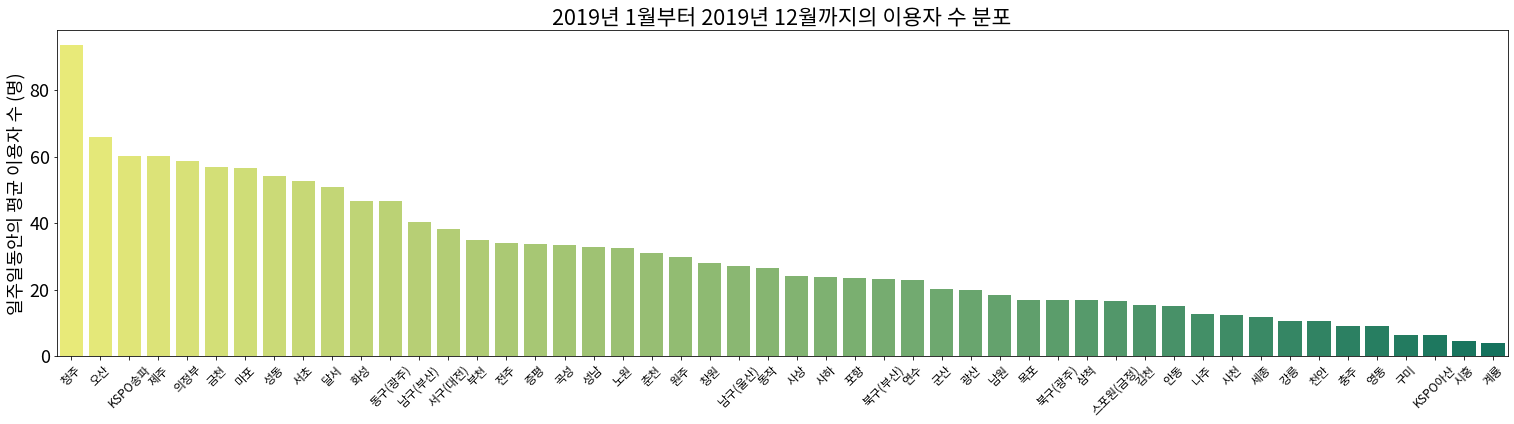

In [200]:
plt.figure(figsize=(26, 6))
temp = df_2019.sort_values('count')
temp['count_mean'] = temp['count']/12/4
temp = temp.sort_values('count_mean', ascending=False)
temp.drop('순천', inplace=True)
sns.barplot(x=temp.index, y=temp['count_mean'], palette='summer_r')
plt.title('2019년 1월부터 2019년 12월까지의 이용자 수 분포')
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('일주일동안의 평균 이용자 수 (명)')
plt.show()

In [201]:
temp.describe()

,count,total_20,total_60,perc20,perc60,percmf,percmf20,percmf60,cluster_1,count_mean
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,1436.100000,469.040000,494.320000,35.534600,28.587200,0.864400,1.04140,0.836600,0.940000,29.918750
std,932.090787,312.917539,523.409327,15.824954,15.527767,0.375924,0.43705,0.568717,0.651842,19.418558
min,191.000000,60.000000,0.000000,3.990000,0.000000,0.260000,0.41000,0.000000,0.000000,3.979167
25%,756.500000,211.250000,126.250000,24.105000,19.007500,0.617500,0.72750,0.430000,1.000000,15.760417
50%,1211.000000,438.500000,315.500000,34.865000,26.395000,0.845000,0.95000,0.690000,1.000000,25.229167
75%,1909.750000,652.250000,684.500000,44.240000,35.470000,1.002500,1.22000,1.147500,1.000000,39.786458
max,4485.000000,1246.000000,2839.000000,82.960000,78.050000,2.110000,2.58000,2.460000,2.000000,93.437500
